In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm #progress bar
import rdkit
from rdkit import Chem #Chemistry
from rdkit.Chem import rdMolDescriptors #molecular descriptors
from rdkit.Chem import PandasTools
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
rdkit.__version__


/Users/NathanJiang/opt/anaconda3/envs/tf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'2023.03.2'

In [2]:
import xgboost
import sklearn
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split #ML training
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error #ML stats
#from yellowbrick.regressor import prediction_error, ResidualsPlot
from tdc.single_pred import ADME
from tdc.benchmark_group import admet_group
from tdc import BenchmarkGroup
import warnings
warnings.filterwarnings("ignore")

2023-08-22 11:42:49.099112: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
def get_rdkit(smiles_string):
    mol = Chem.MolFromSmiles(smiles_string)
    chosen_descriptors = ['BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'EState_VSA1', 'EState_VSA10', 'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5', 'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'ExactMolWt', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'FractionCSP3', 'HallKierAlpha', 'HeavyAtomCount', 'HeavyAtomMolWt', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'MaxAbsEStateIndex', 'MaxAbsPartialCharge', 'MaxEStateIndex', 'MaxPartialCharge', 'MinAbsEStateIndex', 'MinAbsPartialCharge', 'MinEStateIndex', 'MinPartialCharge', 'MolLogP', 'MolMR', 'MolWt', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles', 'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRadicalElectrons', 'NumRotatableBonds', 'NumSaturatedCarbocycles', 'NumSaturatedHeterocycles', 'NumSaturatedRings', 'NumValenceElectrons', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'RingCount', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'VSA_EState1', 'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5', 'VSA_EState6', 'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S', 'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1', 'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde', 'fr_alkyl_carbamate', 'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine', 'fr_aniline', 'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene', 'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine', 'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan', 'fr_ketone', 'fr_ketone_Topliss', 'fr_lactam', 'fr_lactone', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho', 'fr_nitroso', 'fr_oxazole', 'fr_oxime', 'fr_para_hydroxylation', 'fr_phenol', 'fr_phenol_noOrthoHbond', 'fr_phos_acid', 'fr_phos_ester', 'fr_piperdine', 'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd', 'fr_pyridine', 'fr_quatN', 'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole', 'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea', 'qed']
    mol_descriptor_calculator = MolecularDescriptorCalculator(chosen_descriptors)
    return list(mol_descriptor_calculator.CalcDescriptors(mol))
    

In [50]:
group = admet_group(path = 'data/')
predictions_list_xgb = []
best_params_list_xgb = []
predictions_list_rf = []
predictions_list_svm = []
best_params_list_svm = []
predictions_list_adb = []
predictions_list_cnn = []

for seed in [1, 2, 3, 4, 5]:
    predictions_xgb = {}
    predictions_rf = {}
    predictions_svm = {}
    predictions_adb = {}
    predictions_cnn = {}

    benchmark = group.get('PPBR_AZ')
    name = benchmark['name']
    train_val, test = benchmark['train_val'], benchmark['test']
    train, valid = group.get_train_valid_split(benchmark = name, split_type = 'default', seed = seed)
    
    nBits=200
    rdkit_des = [get_rdkit(smile) for smile in train['Drug']]
    rdkit_name = [f'Bit_{i}' for i in range(nBits)]
    rdkit_bits = [list(l) for l in rdkit_des]
    Y = train['Y']
    train = pd.DataFrame(rdkit_bits, index = train.Drug, columns=rdkit_name).reset_index(drop = False)
    train['Y'] = Y
    #train = train.dropna(axis=1)
    
    rdkit_des = [get_rdkit(smile) for smile in test['Drug']]
    rdkit_bits = [list(l) for l in rdkit_des]
    Y = test['Y']
    test = pd.DataFrame(rdkit_bits, index = test.Drug, columns=rdkit_name).reset_index(drop = False)
    test['Y'] = Y
    #test = test.drop(axis=1)

    train_X = train.drop(columns = ["Drug","Y"])
    train_y = train.Y
    test_X = test.drop(columns = ["Drug","Y"])
    test_y = test.Y

    
    #XGBoost + RDKit
    xgb_parameters = {'objective':['reg:squarederror'],
            'booster':['gbtree','gblinear'],
            'learning_rate': [0.1],
            'max_depth': [7,10,15,20],
            'min_child_weight': [10,15,20,25],
            'colsample_bytree': [0.8, 0.9, 1],
            'n_estimators': [300,400,500,600],
            "reg_alpha"   : [0.5,0.2,1],
            "reg_lambda"  : [2,3,5],
            "gamma"       : [1,2,3]}

    xgb_model = XGBRegressor()
    grid_obj_xgb = RandomizedSearchCV(xgb_model, xgb_parameters, cv=5, n_iter=15, scoring='neg_mean_absolute_error', verbose=5, n_jobs=1)
    grid_obj_xgb.fit(train_X, train_y, verbose = 1)
    y_pred_test_xgb = grid_obj_xgb.predict(test_X)
    bp_xgb = grid_obj_xgb.best_params_
    predictions_xgb[name] = y_pred_test_xgb
    predictions_list_xgb.append(predictions_xgb)
    best_params_list_xgb.append(bp_xgb)

    #Random Forest + RDKit
    rf_model = RandomForestRegressor()
    rf_model.fit(train_X, train_y)
    y_pred_test_rf = rf_model.predict(test_X)
    predictions_rf[name] = y_pred_test_rf
    predictions_list_rf.append(predictions_rf)

    #SVM + RDKit
    svm_parameters = {
        'C': [0.1, 1, 10, 100, 1000],
        'epsilon': [0.0001, 0.001, 0.01, 0.1, 0.5],
        'gamma': [0.0001, 0.001, 0.01, 0.1, 1]
    }
    svm_model = SVR(kernel="rbf")
    grid_obj_svm = RandomizedSearchCV(svm_model, svm_parameters, cv=5, n_iter=15, scoring='neg_mean_absolute_error', verbose=5, n_jobs=1)
    grid_obj_svm.fit(train_X, train_y)
    y_pred_test_svm = grid_obj_svm.predict(test_X)
    bp_svm = grid_obj_svm.best_params_
    predictions_svm[name] = y_pred_test_svm
    predictions_list_svm.append(predictions_svm)
    best_params_list_svm.append(bp_svm)

    # AdaBoost + RDKit
    DTR = DecisionTreeRegressor(max_depth=4)
    adb_model = AdaBoostRegressor(n_estimators=300, base_estimator=DTR, learning_rate=1)
    adb_model.fit(train_X, train_y)
    y_pred_test_adb = adb_model.predict(test_X)
    predictions_adb[name] = y_pred_test_adb
    predictions_list_adb.append(predictions_adb)
    

    #CNN + RDKit
    train_X = train_X.to_numpy()
    test_X = test_X.to_numpy()
    train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], 1)
    test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], 1)
    cnn_model = Sequential()
    cnn_model.add(Conv1D(32, 2, activation="relu", input_shape=(200,1)))
    cnn_model.add(Flatten())
    cnn_model.add(Dense(64, activation="relu"))
    cnn_model.add(Dense(1))
    opt = keras.optimizers.Adam(learning_rate=0.001,clipnorm=1)
    cnn_model.compile(loss="mse", optimizer=opt)
    cnn_model.fit(train_X, train_y, batch_size=128, epochs=10, verbose=0)
    y_pred_test_cnn = cnn_model.predict(test_X)
    predictions_cnn[name] = y_pred_test_cnn
    predictions_list_cnn.append(predictions_cnn)

xgb_results = group.evaluate_many(predictions_list_xgb)
rf_results = group.evaluate_many(predictions_list_rf)
svm_results = group.evaluate_many(predictions_list_svm)
adb_results = group.evaluate_many(predictions_list_adb)
cnn_results = group.evaluate_many(predictions_list_cnn)


Found local copy...
generating training, validation splits...
100%|██████████| 2231/2231 [00:01<00:00, 1917.83it/s]


18/18 [==============================] - 0s 1ms/step


generating training, validation splits...
100%|██████████| 2231/2231 [00:01<00:00, 1995.52it/s]


18/18 [==============================] - 0s 1ms/step


generating training, validation splits...
100%|██████████| 2231/2231 [00:01<00:00, 2096.63it/s]


18/18 [==============================] - 0s 1ms/step


generating training, validation splits...
100%|██████████| 2231/2231 [00:01<00:00, 2080.33it/s]


18/18 [==============================] - 0s 1ms/step


generating training, validation splits...
100%|██████████| 2231/2231 [00:01<00:00, 2072.55it/s]


18/18 [==============================] - 0s 1ms/step


In [35]:
predictions_list_cnn = [{'ppbr_az': np.array([1.57494648e+04,
         1.57494648e+04,
         3.79486267e+02,
         3.79486267e+02,
         2.72688789e+01,
         3.05253048e+01,
         2.72688789e+01,
         3.05253048e+01,
         2.12245850e+03,
         3.84877228e+02,
         1.46140167e+02,
         2.12121399e+02,
         1.46140167e+02,
         2.12121399e+02,
         2.12121399e+02,
         6.06926765e+01,
         1.46140167e+02,
         2.03214779e+01,
         4.67830887e+01,
         2.73314233e+03,
         2.88521851e+03,
         4.12589906e+05,
         2.47679453e+04,
         6.21240332e+03,
         6.21240332e+03,
         6.21240332e+03,
         3.10844955e+01,
         3.33076935e+01,
         3.33076935e+01,
         3.10844955e+01,
         2.40409988e+02,
         4.41038910e+02,
         2.64773340e+03,
         2.64773340e+03,
         1.10075781e+03,
         1.10075781e+03,
         2.23458206e+02,
         2.23458206e+02,
         2.23458206e+02,
         2.23458206e+02,
         2.23458206e+02,
         2.23458206e+02,
         2.23458206e+02,
         2.23458206e+02,
         2.62798950e+03,
         9.66488770e+02,
         3.40351074e+02,
         7.36261841e+02,
         7.36261841e+02,
         7.36261841e+02,
         7.36261841e+02,
         7.36261841e+02,
         7.36261841e+02,
         2.81266455e+03,
         4.64690094e+02,
         2.96580750e+02,
         2.15940063e+02,
         4.64690094e+02,
         1.03807190e+02,
         1.28169510e+02,
         1.03807190e+02,
         5.36319580e+02,
         1.28169510e+02,
         2.22458588e+02,
         6.24690018e+01,
         6.00165466e+02,
         8.10287292e+02,
         4.83801416e+03,
         4.83801416e+03,
         3.96123779e+02,
         3.96123779e+02,
         2.05433057e+03,
         1.88781116e+03,
         1.88781116e+03,
         5.22362854e+02,
         5.22362854e+02,
         5.22362854e+02,
         1.37099237e+01,
         5.41889990e+03,
         5.22472168e+02,
         1.13484741e+03,
         5.22362854e+02,
         9.11469299e+02,
         1.13484741e+03,
         1.13484741e+03,
         2.59323608e+02,
         4.70840179e+02,
         2.59323608e+02,
         2.59323608e+02,
         4.70840179e+02,
         4.70840179e+02,
         6.17126656e+01,
         6.17126656e+01,
         3.06008728e+02,
         1.76912266e+04,
         2.32032450e+06,
         2.32032450e+06,
         2.35027466e+01,
         2.35027466e+01,
         2.35027466e+01,
         3.30449097e+02,
         3.30449097e+02,
         3.30449097e+02,
         6.27419141e+03,
         5.42446671e+01,
         5.42446671e+01,
         1.24167318e+01,
         1.52610706e+03,
         1.52610706e+03,
         9.12922363e+03,
         5.19072754e+03,
         5.19072754e+03,
         8.72373505e+01,
         4.61328217e+02,
         4.61328217e+02,
         4.61328217e+02,
         1.58300095e+01,
         1.30207329e+01,
         1.00614319e+01,
         2.90559902e+01,
         4.09912834e+01,
         4.09912834e+01,
         2.21617691e+02,
         2.09850098e+04,
         2.09850098e+04,
         1.03073643e+04,
         1.03073643e+04,
         1.03073643e+04,
         4.18014600e+03,
         1.51302393e+03,
         6.89084424e+03,
         6.89084424e+03,
         4.18014600e+03,
         1.51302393e+03,
         4.18014600e+03,
         1.51302393e+03,
         3.60073853e+02,
         3.60073853e+02,
         1.57493896e+04,
         3.99982452e+01,
         3.93173790e+01,
         2.70324768e+02,
         1.42352188e+02,
         9.36683789e+03,
         2.28245664e+04,
         9.36669336e+03,
         1.62060234e+04,
         6.59950342e+03,
         1.61309883e+04,
         9.29115430e+03,
         9.29131445e+03,
         3.49741250e+04,
         1.49476504e+04,
         2.28998164e+04,
         1.42466816e+04,
         8.21344070e+01,
         8.21344070e+01,
         1.46672745e+02,
         1.16058203e+04,
         9.70768433e+02,
         9.70768433e+02,
         1.41973047e+03,
         1.41973047e+03,
         8.98191284e+02,
         8.98191284e+02,
         8.98191284e+02,
         3.73750366e+03,
         4.20725784e+01,
         1.09485350e+01,
         1.39735537e+01,
         9.11885357e+00,
         5.69666162e+03,
         5.69666162e+03,
         1.37098475e+01,
         1.37098475e+01,
         1.37098475e+01,
         1.37098475e+01,
         2.65620270e+02,
         2.65620270e+02,
         2.65620270e+02,
         2.65620270e+02,
         4.98057373e+03,
         2.06108913e+01,
         9.84114647e+00,
         1.02316711e+02,
         7.19520874e+01,
         7.19520874e+01,
         7.19520874e+01,
         2.38825605e+04,
         1.08318733e+02,
         1.08318733e+02,
         6.53739453e+03,
         6.53739453e+03,
         6.53739453e+03,
         2.54682846e+02,
         1.48473877e+02,
         1.89496143e+03,
         6.23645973e+01,
         6.23645973e+01,
         3.88143125e+05,
         3.88143125e+05,
         1.20851845e+02,
         1.00173254e+03,
         1.00173254e+03,
         2.07464554e+02,
         2.10817871e+03,
         5.86694805e+04,
         5.86694805e+04,
         2.10817871e+03,
         5.86694805e+04,
         7.77942627e+03,
         1.68401642e+01,
         1.80129434e+04,
         1.69311597e+03,
         4.55468018e+03,
         7.45866211e+03,
         3.92855493e+03,
         1.77582898e+03,
         1.75159973e+03,
         2.62354688e+03,
         8.71311750e+05,
         8.71311750e+05,
         8.71311750e+05,
         8.71311750e+05,
         1.10082803e+04,
         1.86923359e+04,
         1.51029561e+04,
         1.10081504e+04,
         1.86923359e+04,
         7.60712793e+03,
         1.10081504e+04,
         7.60712793e+03,
         1.88755977e+04,
         1.88755977e+04,
         7.60712793e+03,
         1.53083320e+04,
         1.86923359e+04,
         1.51029561e+04,
         2.34568125e+04,
         1.53083320e+04,
         1.10081504e+04,
         2.34568125e+04,
         1.86923359e+04,
         1.08196943e+04,
         2.80409785e+04,
         1.08196943e+04,
         1.53083320e+04,
         1.65826914e+04,
         1.65826914e+04,
         1.51029561e+04,
         7.60712793e+03,
         7.60712793e+03,
         1.08196943e+04,
         2.80409785e+04,
         1.88755977e+04,
         1.10081504e+04,
         2.34568125e+04,
         1.00369177e+01,
         1.18602781e+01,
         8.71010547e+03,
         3.27057404e+02,
         3.27057404e+02,
         8.84180832e+01,
         3.27057404e+02,
         2.22516388e+02,
         1.03864822e+02,
         1.03864822e+02,
         5.79111938e+02,
         6.25288887e+01,
         8.84180832e+01,
         6.25288887e+01,
         1.27938217e+02,
         5.79111938e+02,
         2.88710781e+04,
         1.33879669e+02,
         2.78203125e+03,
         8.28594055e+01,
         2.90705762e+03,
         2.90705762e+03,
         1.24971123e+02,
         1.24971123e+02,
         3.65988550e+03,
         1.01909443e+04,
         1.01909443e+04,
         1.01910498e+04,
         1.42138042e+01,
         2.50184629e+04,
         1.01121702e+01,
         1.19300957e+04,
         1.19300957e+04,
         6.09509766e+04,
         2.40886593e+01,
         8.78605234e+04,
         1.37301540e+01,
         1.35466263e+02,
         1.49916122e+02,
         1.06475635e+04,
         8.69587898e+00,
         1.08615654e+02,
         1.08615654e+02,
         1.75238205e+02,
         1.08615654e+02,
         1.08615654e+02,
         1.75238205e+02,
         1.75238205e+02,
         1.08615654e+02,
         1.32073425e+03,
         1.32073425e+03,
         1.32073425e+03,
         8.93671484e+03,
         8.93671484e+03,
         2.58876831e+02,
         4.62229312e+05,
         2.06280688e+03,
         2.06280688e+03,
         1.40508700e+06,
         1.40508700e+06,
         1.66790352e+04,
         1.00851094e+04,
         2.71617676e+04,
         2.71617676e+04,
         6.34223828e+03,
         6.34223828e+03,
         6.34223828e+03,
         6.34223828e+03,
         2.46360527e+04,
         2.46360527e+04,
         1.43825947e+04,
         1.43825947e+04,
         2.46360527e+04,
         1.40326416e+02,
         1.40059570e+02,
         1.40059570e+02,
         1.40326416e+02,
         7.19618530e+02,
         1.02537708e+03,
         7.19618530e+02,
         7.19618530e+02,
         1.54635925e+03,
         1.02518860e+03,
         1.02537708e+03,
         1.02518860e+03,
         1.02518860e+03,
         1.01446191e+03,
         7.10142334e+03,
         3.80761328e+04,
         9.43190391e+04,
         8.12659546e+02,
         6.34787109e+02,
         9.11384500e+06,
         9.11384500e+06,
         8.32592964e+00,
         2.54145775e+01,
         4.12896406e+04,
         4.12896406e+04,
         4.12896406e+04,
         4.12896406e+04,
         4.12896406e+04,
         4.24838965e+03,
         1.02384648e+04,
         1.14502917e+03,
         1.14502917e+03,
         1.19302090e+04,
         3.65864067e+01,
         1.91803198e+03,
         3.78349683e+03,
         3.78349683e+03,
         3.78349683e+03,
         3.70092773e+02,
         3.70092773e+02,
         1.79937134e+03,
         2.47205273e+03,
         1.79937134e+03,
         7.90936768e+03,
         3.50498657e+03,
         8.48279688e+03,
         8.48279688e+03,
         2.68841968e+03,
         2.68841968e+03,
         2.68841968e+03,
         9.98826313e+00,
         9.98826313e+00,
         4.15230688e+05,
         4.15230688e+05,
         4.15230688e+05,
         4.15217090e+03,
         4.15217090e+03,
         4.85032227e+03,
         1.07297568e+04,
         1.07297568e+04,
         1.07297568e+04,
         2.89607563e+01,
         2.89607563e+01,
         2.89607563e+01,
         6.98604443e+03,
         4.24410498e+03,
         5.99155518e+03,
         2.99552808e+03,
         4.24410791e+03,
         7.33875684e+03,
         5.79922168e+03,
         1.33579047e+05,
         1.56326538e+03,
         2.12306211e+04,
         2.12306211e+04,
         7.56367480e+03,
         1.16070264e+04,
         1.16070264e+04,
         2.36275500e+05,
         2.54831885e+03,
         1.98581009e+01,
         1.89714622e+01,
         1.48758020e+01,
         9.16742516e+00,
         9.16742516e+00,
         9.29931396e+02,
         9.29931396e+02,
         9.29931396e+02,
         8.59852812e+04,
         4.55527539e+03,
         1.19986650e+04,
         7.32759814e+03,
         4.55527539e+03,
         1.19986650e+04,
         6.36837988e+03,
         6.36837988e+03,
         7.32759814e+03,
         1.19986650e+04,
         1.06906404e+01,
         1.28259058e+03,
         2.36210571e+03,
         1.85886096e+03,
         5.34318924e+01,
         5.34318924e+01,
         1.81237732e+02,
         4.80076445e+04,
         9.11609802e+01,
         2.10774043e+04,
         2.10774043e+04,
         3.00863926e+04,
         1.38837000e+03,
         9.99162231e+02,
         9.99162231e+02,
         9.99162231e+02,
         3.03375508e+04,
         4.86759338e+01,
         1.81707325e+01,
         1.81707325e+01,
         2.79254944e+02,
         6.40914062e+02,
         8.89600586e+02,
         6.41140869e+02,
         2.07947830e+02,
         2.02887634e+02,
         4.75682251e+02,
         1.51404160e+02,
         6.10923320e+04,
         6.10923320e+04,
         2.38644160e+07,
         1.15233757e+02,
         1.15233757e+02,
         1.15233757e+02,
         6.65802795e+02,
         6.65802795e+02,
         6.65802795e+02,
         2.93442559e+04,
         1.44439030e+01,
         1.18390741e+01,
         7.69516953e+04,
         7.69516953e+04,
         2.95322857e+01,
         2.95322857e+01,
         2.95322857e+01,
         2.46884537e+01,
         3.30950415e+03,
         3.30950415e+03,
         7.26049728e+01,
         7.26049728e+01,
         4.62236359e+02,
         4.62236359e+02,
         4.62236359e+02,
         6.36982117e+01,
         1.28280596e+04,
         1.84913086e+04,
         1.84913086e+04,
         1.28280596e+04,
         1.28280596e+04,
         1.76914648e+04,
         6.06268188e+05,
         4.05105515e+01,
         1.16061475e+04,
         1.16061475e+04,
         1.16061475e+04,
         1.16061475e+04,
         1.41160453e+05,
         4.76600439e+03,
         2.57844276e+01,
         4.37467139e+03,
         6.32158281e+04,
         4.57282910e+03,
         2.90937012e+04,
         1.18836553e+04,
         4.11351758e+04,
         6.65442062e+05,
         2.97861641e+04,
         2.97861641e+04,
         2.97861641e+04,
         9.79032135e+01,
         1.43402367e+01,
         1.24004990e+02,
         1.43402367e+01,
         1.24004990e+02,
         1.25943057e+04,
         2.19850578e+05,
         2.07909374e+01,
         2.07909374e+01,
         1.28641865e+04,
         1.25273237e+01,
         3.76011499e+03,
         3.76011499e+03,
         1.26560524e+02,
         1.26560524e+02,
         1.08640176e+04,
         5.05579590e+03,
         1.08640176e+04,
         6.78592432e+03,
         6.78592432e+03,
         6.78592432e+03,
         6.78592432e+03,
         1.21654305e+02,
         1.47643340e+04,
         1.47643340e+04,
         1.47643340e+04,
         2.11981979e+02,
         1.46011185e+02,
         2.11981979e+02,
         1.46011185e+02,
         8.75346375e+01,
         2.11981979e+02,
         1.46011185e+02,
         6.05782776e+01,
         3.30509529e+01,
         4.43470361e+03,
         7.47743164e+03,
         4.38121289e+03,
         2.90139917e+03,
         4.47884033e+03,
         7.35316602e+03,
         5.86415234e+03,
         5.86415234e+03,
         1.04221865e+04,
         1.04221865e+04,
         1.77610547e+03,
         1.77610547e+03,
         1.09021034e+01,
         9.42277718e+00,
         3.39870003e+10,
         3.39870003e+10,
         9.55486450e+02])},
 {'ppbr_az': np.array([2.8154186e+04,
         2.8154186e+04,
         7.1050812e+02,
         7.1050812e+02,
         7.2413170e+01,
         7.9110588e+01,
         7.2413170e+01,
         7.9110588e+01,
         3.8237966e+03,
         7.1947845e+02,
         2.8987091e+02,
         4.0930328e+02,
         2.8987091e+02,
         4.0930328e+02,
         4.0930328e+02,
         1.3427730e+02,
         2.8987091e+02,
         5.5907604e+01,
         1.1396745e+02,
         4.9100503e+03,
         5.1823701e+03,
         7.3638844e+05,
         4.4245570e+04,
         1.1131995e+04,
         1.1131995e+04,
         1.1131995e+04,
         8.6473984e+01,
         9.5336365e+01,
         9.5336365e+01,
         8.6473984e+01,
         4.5934430e+02,
         8.2372632e+02,
         4.7641313e+03,
         4.7641313e+03,
         2.0004150e+03,
         2.0004150e+03,
         4.2336041e+02,
         4.2336041e+02,
         4.2336041e+02,
         4.2336041e+02,
         4.2336041e+02,
         4.2336041e+02,
         4.2336041e+02,
         4.2336041e+02,
         4.7275117e+03,
         1.7565690e+03,
         6.3906714e+02,
         1.3503604e+03,
         1.3503604e+03,
         1.3503604e+03,
         1.3503604e+03,
         1.3503604e+03,
         1.3503604e+03,
         5.0596650e+03,
         8.6385834e+02,
         5.6375854e+02,
         4.1785034e+02,
         8.6385834e+02,
         2.1451813e+02,
         2.6013037e+02,
         2.1451813e+02,
         9.9217401e+02,
         2.6013037e+02,
         4.2854855e+02,
         1.3961884e+02,
         1.1140375e+03,
         1.4822410e+03,
         8.6786309e+03,
         8.6786309e+03,
         7.3564105e+02,
         7.3564105e+02,
         3.7005461e+03,
         3.4093447e+03,
         3.4093447e+03,
         9.6771234e+02,
         9.6771234e+02,
         9.6771234e+02,
         5.0217113e+01,
         9.7195469e+03,
         9.6770093e+02,
         2.0630596e+03,
         9.6771234e+02,
         1.6625719e+03,
         2.0630596e+03,
         2.0630596e+03,
         4.9713281e+02,
         8.8151849e+02,
         4.9713281e+02,
         4.9713281e+02,
         8.8151849e+02,
         8.8151849e+02,
         1.3731569e+02,
         1.3731569e+02,
         5.7982007e+02,
         3.1611969e+04,
         4.1409670e+06,
         4.1409670e+06,
         6.5901917e+01,
         6.5901917e+01,
         6.5901917e+01,
         6.3024304e+02,
         6.3024304e+02,
         6.3024304e+02,
         1.1232192e+04,
         1.2166825e+02,
         1.2166825e+02,
         5.1372608e+01,
         2.7577180e+03,
         2.7577180e+03,
         1.6336213e+04,
         9.3031182e+03,
         9.3031182e+03,
         1.8361629e+02,
         8.5409082e+02,
         8.5409082e+02,
         8.5409082e+02,
         5.0204788e+01,
         5.4504990e+01,
         4.9153225e+01,
         5.6599789e+01,
         5.7516796e+01,
         5.7516796e+01,
         4.2675827e+02,
         3.7496156e+04,
         3.7496156e+04,
         1.8433029e+04,
         1.8433029e+04,
         1.8433029e+04,
         7.4972803e+03,
         2.7375493e+03,
         1.2336277e+04,
         1.2336277e+04,
         7.4972803e+03,
         2.7375493e+03,
         7.4972803e+03,
         2.7375493e+03,
         6.7434332e+02,
         6.7434332e+02,
         2.8154074e+04,
         9.7813889e+01,
         9.6856232e+01,
         5.2117133e+02,
         2.9275769e+02,
         1.6762668e+04,
         4.0780234e+04,
         1.6763482e+04,
         2.8968514e+04,
         1.1822367e+04,
         2.8834133e+04,
         1.6628246e+04,
         1.6627852e+04,
         6.2464156e+04,
         2.6722482e+04,
         4.0915047e+04,
         2.5472457e+04,
         1.7487491e+02,
         1.7487491e+02,
         2.8950491e+02,
         2.0754584e+04,
         1.7674987e+03,
         1.7674987e+03,
         2.5753530e+03,
         2.5753530e+03,
         1.6384933e+03,
         1.6384933e+03,
         1.6384933e+03,
         6.7125142e+03,
         1.0546566e+02,
         5.4034416e+01,
         4.6283031e+01,
         4.7322056e+01,
         1.0208312e+04,
         1.0208312e+04,
         4.7476116e+01,
         4.7476116e+01,
         4.7476116e+01,
         4.7476116e+01,
         5.0822504e+02,
         5.0822504e+02,
         5.0822504e+02,
         5.0822504e+02,
         8.9302422e+03,
         5.4519466e+01,
         5.1518574e+01,
         2.0989043e+02,
         1.6866908e+02,
         1.6866908e+02,
         1.6866908e+02,
         4.2663328e+04,
         2.2815317e+02,
         2.2815317e+02,
         1.1716432e+04,
         1.1716432e+04,
         1.1716432e+04,
         4.8522690e+02,
         2.9497763e+02,
         3.4231157e+03,
         1.3917815e+02,
         1.3917815e+02,
         6.9274669e+05,
         6.9274669e+05,
         2.5315553e+02,
         1.8269379e+03,
         1.8269379e+03,
         4.0142349e+02,
         3.8012551e+03,
         1.0475059e+05,
         1.0475059e+05,
         3.8012551e+03,
         1.0475059e+05,
         1.3926846e+04,
         5.8536404e+01,
         3.2191418e+04,
         3.0597446e+03,
         8.1693252e+03,
         1.3353074e+04,
         7.0543760e+03,
         3.2093782e+03,
         3.1649414e+03,
         4.7209385e+03,
         1.5550325e+06,
         1.5550325e+06,
         1.5550325e+06,
         1.5550325e+06,
         1.9685215e+04,
         3.3400145e+04,
         2.6993172e+04,
         1.9685082e+04,
         3.3400145e+04,
         1.3613852e+04,
         1.9685082e+04,
         1.3613852e+04,
         3.3727535e+04,
         3.3727535e+04,
         1.3613852e+04,
         2.7360205e+04,
         3.3400145e+04,
         2.6993172e+04,
         4.1904121e+04,
         2.7360205e+04,
         1.9685082e+04,
         4.1904121e+04,
         3.3400145e+04,
         1.9348336e+04,
         5.0084637e+04,
         1.9348336e+04,
         2.7360205e+04,
         2.9634697e+04,
         2.9634697e+04,
         2.6993172e+04,
         1.3613852e+04,
         1.3613852e+04,
         1.9348336e+04,
         5.0084637e+04,
         3.3727535e+04,
         1.9685082e+04,
         4.1904121e+04,
         5.4131924e+01,
         5.3762436e+01,
         1.5586180e+04,
         6.1782123e+02,
         6.1782123e+02,
         1.8848137e+02,
         6.1782123e+02,
         4.2974734e+02,
         2.1575403e+02,
         2.1575403e+02,
         1.0699272e+03,
         1.4087395e+02,
         1.8848137e+02,
         1.4087395e+02,
         2.6128540e+02,
         1.0699272e+03,
         5.1564156e+04,
         2.6783368e+02,
         4.9979424e+03,
         1.7270955e+02,
         5.2298896e+03,
         5.2298896e+03,
         2.5159721e+02,
         2.5159721e+02,
         6.5714702e+03,
         1.8229664e+04,
         1.8229664e+04,
         1.8229396e+04,
         4.8550987e+01,
         4.4692852e+04,
         5.1497524e+01,
         2.1333877e+04,
         2.1333877e+04,
         1.0882117e+05,
         6.7272133e+01,
         1.5685009e+05,
         5.3966602e+01,
         2.7079062e+02,
         2.9724094e+02,
         1.9037734e+04,
         4.9297985e+01,
         2.2440349e+02,
         2.2440349e+02,
         3.4360770e+02,
         2.2440349e+02,
         2.2440349e+02,
         3.4360770e+02,
         3.4360770e+02,
         2.2440349e+02,
         2.3933508e+03,
         2.3933508e+03,
         2.3933508e+03,
         1.5991817e+04,
         1.5991817e+04,
         4.9738470e+02,
         8.2496294e+05,
         3.7243267e+03,
         3.7243267e+03,
         2.5076068e+06,
         2.5076068e+06,
         2.9807828e+04,
         1.8038779e+04,
         4.8519012e+04,
         4.8519012e+04,
         1.1360568e+04,
         1.1360568e+04,
         1.1360568e+04,
         1.1360568e+04,
         4.4011914e+04,
         4.4011914e+04,
         2.5712125e+04,
         2.5712125e+04,
         4.4011914e+04,
         2.8129584e+02,
         2.8174963e+02,
         2.8174963e+02,
         2.8129584e+02,
         1.3174935e+03,
         1.8643163e+03,
         1.3174935e+03,
         1.3174935e+03,
         2.7965295e+03,
         1.8650717e+03,
         1.8643163e+03,
         1.8650717e+03,
         1.8650717e+03,
         1.8408715e+03,
         1.2711680e+04,
         6.8002859e+04,
         1.6837288e+05,
         1.4913654e+03,
         1.1722803e+03,
         1.6264862e+07,
         1.6264862e+07,
         6.3224270e+01,
         7.0461113e+01,
         7.3732141e+04,
         7.3732141e+04,
         7.3732141e+04,
         7.3732141e+04,
         7.3732141e+04,
         7.6236069e+03,
         1.8316318e+04,
         2.0790618e+03,
         2.0790618e+03,
         2.1333951e+04,
         9.8123238e+01,
         3.4581765e+03,
         6.7887583e+03,
         6.7887583e+03,
         6.7887583e+03,
         6.9222906e+02,
         6.9222906e+02,
         3.2471794e+03,
         4.4491182e+03,
         3.2471794e+03,
         1.4159334e+04,
         6.2940278e+03,
         1.5192342e+04,
         1.5192342e+04,
         4.8461831e+03,
         4.8461831e+03,
         4.8461831e+03,
         5.1688572e+01,
         5.1688572e+01,
         7.4108112e+05,
         7.4108112e+05,
         7.4108112e+05,
         7.4492432e+03,
         7.4492432e+03,
         8.6964707e+03,
         1.9194113e+04,
         1.9194113e+04,
         1.9194113e+04,
         7.6535561e+01,
         7.6535561e+01,
         7.6535561e+01,
         1.2513611e+04,
         7.6185186e+03,
         1.0739334e+04,
         5.3884707e+03,
         7.6192651e+03,
         1.3142503e+04,
         1.0396182e+04,
         2.3843431e+05,
         2.8255667e+03,
         3.7932547e+04,
         3.7932547e+04,
         1.3534678e+04,
         2.0759857e+04,
         2.0759857e+04,
         4.2171556e+05,
         4.5865537e+03,
         5.8215305e+01,
         5.9668896e+01,
         4.7353157e+01,
         5.5274292e+01,
         5.5274292e+01,
         1.6887192e+03,
         1.6887192e+03,
         1.6887192e+03,
         1.5349661e+05,
         8.1687212e+03,
         2.1454785e+04,
         1.3117464e+04,
         8.1687212e+03,
         2.1454785e+04,
         1.1405893e+04,
         1.1405893e+04,
         1.3117464e+04,
         2.1454785e+04,
         5.6196133e+01,
         2.3243772e+03,
         4.2591758e+03,
         3.3535632e+03,
         1.2208017e+02,
         1.2208017e+02,
         3.5635071e+02,
         8.5715844e+04,
         4.0473713e+01,
         3.7658922e+04,
         3.7658922e+04,
         5.3737988e+04,
         2.5192642e+03,
         1.8149854e+03,
         1.8149854e+03,
         1.8149854e+03,
         5.4185348e+04,
         5.5308250e+01,
         5.5695217e+01,
         5.5695217e+01,
         5.3364478e+02,
         1.1840762e+03,
         1.6307678e+03,
         1.1831385e+03,
         4.0357007e+02,
         3.9604291e+02,
         8.8760168e+02,
         3.0268216e+02,
         1.0907406e+05,
         1.0907406e+05,
         4.2589120e+07,
         2.3418668e+02,
         2.3418668e+02,
         2.3418668e+02,
         1.2245598e+03,
         1.2245598e+03,
         1.2245598e+03,
         5.2408691e+04,
         4.6798603e+01,
         4.6484657e+01,
         1.3737672e+05,
         1.3737672e+05,
         7.5933754e+01,
         7.5933754e+01,
         7.5933754e+01,
         6.9707390e+01,
         5.9429985e+03,
         5.9429985e+03,
         1.6105972e+02,
         1.6105972e+02,
         8.5724249e+02,
         8.5724249e+02,
         8.5724249e+02,
         1.3916466e+02,
         2.2930295e+04,
         3.3038734e+04,
         3.3038734e+04,
         2.2930295e+04,
         2.2930295e+04,
         3.1615480e+04,
         1.0820188e+06,
         9.5454758e+01,
         2.0754939e+04,
         2.0754939e+04,
         2.0754939e+04,
         2.0754939e+04,
         2.5197683e+05,
         8.5458125e+03,
         6.9664894e+01,
         7.8416357e+03,
         1.1286835e+05,
         8.2029600e+03,
         5.1969703e+04,
         2.1253734e+04,
         7.3461586e+04,
         1.1876240e+06,
         5.3199750e+04,
         5.3199750e+04,
         5.3199750e+04,
         2.1398711e+02,
         5.7677044e+01,
         2.5461769e+02,
         5.7677044e+01,
         2.5461769e+02,
         2.2516504e+04,
         3.9240062e+05,
         6.7057320e+01,
         6.7057320e+01,
         2.2999537e+04,
         4.2297401e+01,
         6.7604014e+03,
         6.7604014e+03,
         2.5284662e+02,
         2.5284662e+02,
         1.9439688e+04,
         9.0718721e+03,
         1.9439688e+04,
         1.2149639e+04,
         1.2149639e+04,
         1.2149639e+04,
         1.2149639e+04,
         2.5386838e+02,
         2.6393420e+04,
         2.6393420e+04,
         2.6393420e+04,
         4.0898553e+02,
         2.8964679e+02,
         4.0898553e+02,
         2.8964679e+02,
         1.8368491e+02,
         4.0898553e+02,
         2.8964679e+02,
         1.3399121e+02,
         8.3634071e+01,
         7.9509082e+03,
         1.3382412e+04,
         7.8556294e+03,
         5.2139502e+03,
         8.0301035e+03,
         1.3160592e+04,
         1.0501441e+04,
         1.0501441e+04,
         1.8642748e+04,
         1.8642748e+04,
         3.2099673e+03,
         3.2099673e+03,
         4.7655201e+01,
         4.8559937e+01,
         6.0654072e+10,
         6.0654072e+10,
         1.7400436e+03])},
 {'ppbr_az': np.array([2.91970459e+03,
         2.91970459e+03,
         7.89414291e+01,
         7.89414291e+01,
         1.71357212e+01,
         1.67521114e+01,
         1.71357212e+01,
         1.67521114e+01,
         4.00513641e+02,
         8.01013260e+01,
         3.71474266e+01,
         4.84917946e+01,
         3.71474266e+01,
         4.84917946e+01,
         4.84917946e+01,
         2.67420731e+01,
         3.71474266e+01,
         2.62340431e+01,
         4.13033485e+01,
         5.10750305e+02,
         5.39691833e+02,
         7.62957656e+04,
         4.58758398e+03,
         1.15895776e+03,
         1.15895776e+03,
         1.15895776e+03,
         4.11954575e+01,
         4.22495308e+01,
         4.22495308e+01,
         4.11954575e+01,
         5.36316986e+01,
         8.94870834e+01,
         5.01821075e+02,
         5.01821075e+02,
         2.10364548e+02,
         2.10364548e+02,
         4.86201630e+01,
         4.86201630e+01,
         4.86201630e+01,
         4.86201630e+01,
         4.86201630e+01,
         4.86201630e+01,
         4.86201630e+01,
         4.86201630e+01,
         4.93970825e+02,
         1.86036926e+02,
         7.10290527e+01,
         1.46601440e+02,
         1.46601440e+02,
         1.46601440e+02,
         1.46601440e+02,
         1.46601440e+02,
         1.46601440e+02,
         5.26996765e+02,
         9.20216751e+01,
         6.18317184e+01,
         4.67221298e+01,
         9.20216751e+01,
         2.59455070e+01,
         3.08445854e+01,
         2.59455070e+01,
         1.05681000e+02,
         3.08445854e+01,
         4.72092552e+01,
         2.06531410e+01,
         1.22308044e+02,
         1.56746017e+02,
         9.07170837e+02,
         9.07170837e+02,
         7.98891144e+01,
         7.98891144e+01,
         3.86688690e+02,
         3.58351227e+02,
         3.58351227e+02,
         1.05622223e+02,
         1.05622223e+02,
         1.05622223e+02,
         3.92095528e+01,
         1.01562494e+03,
         1.05680229e+02,
         2.18855484e+02,
         1.05622223e+02,
         1.77424423e+02,
         2.18855484e+02,
         2.18855484e+02,
         6.07706871e+01,
         1.01090477e+02,
         6.07706871e+01,
         6.07706871e+01,
         1.01090477e+02,
         1.01090477e+02,
         2.30492001e+01,
         2.30492001e+01,
         6.46667252e+01,
         3.27844751e+03,
         4.29033000e+05,
         4.29033000e+05,
         2.01978817e+01,
         2.01978817e+01,
         2.01978817e+01,
         7.34781342e+01,
         7.34781342e+01,
         7.34781342e+01,
         1.16589795e+03,
         2.10803909e+01,
         2.10803909e+01,
         3.83920860e+01,
         2.89610413e+02,
         2.89610413e+02,
         1.69761499e+03,
         9.67818909e+02,
         9.67818909e+02,
         2.58742123e+01,
         9.25353165e+01,
         9.25353165e+01,
         9.25353165e+01,
         3.30772247e+01,
         3.81144829e+01,
         3.34922256e+01,
         4.02750587e+01,
         3.52134895e+01,
         3.52134895e+01,
         4.95372353e+01,
         3.88804468e+03,
         3.88804468e+03,
         1.91413391e+03,
         1.91413391e+03,
         1.91413391e+03,
         7.80699585e+02,
         2.86274078e+02,
         1.28193591e+03,
         1.28193591e+03,
         7.80699585e+02,
         2.86274078e+02,
         7.80699585e+02,
         2.86274078e+02,
         7.30108032e+01,
         7.30108032e+01,
         2.91942651e+03,
         2.08968678e+01,
         2.09821167e+01,
         6.27174225e+01,
         4.49284325e+01,
         1.74328149e+03,
         4.23007959e+03,
         1.74328003e+03,
         3.00749512e+03,
         1.23176660e+03,
         2.99354199e+03,
         1.72918958e+03,
         1.72985254e+03,
         6.47648633e+03,
         2.77443994e+03,
         4.24398975e+03,
         2.64544678e+03,
         2.51656799e+01,
         2.51656799e+01,
         3.43888817e+01,
         2.15724780e+03,
         1.86336838e+02,
         1.86336838e+02,
         2.74373444e+02,
         2.74373444e+02,
         1.74620071e+02,
         1.74620071e+02,
         1.74620071e+02,
         7.01793640e+02,
         4.11335716e+01,
         3.84614258e+01,
         2.95010929e+01,
         3.25801048e+01,
         1.06159412e+03,
         1.06159412e+03,
         3.38194542e+01,
         3.38194542e+01,
         3.38194542e+01,
         3.38194542e+01,
         5.80007172e+01,
         5.80007172e+01,
         5.80007172e+01,
         5.80007172e+01,
         9.28063049e+02,
         3.41555862e+01,
         3.30823784e+01,
         2.88288593e+01,
         3.40700226e+01,
         3.40700226e+01,
         3.40700226e+01,
         4.42394189e+03,
         3.82779503e+01,
         3.82779503e+01,
         1.22082886e+03,
         1.22082886e+03,
         1.22082886e+03,
         5.56265182e+01,
         3.60080185e+01,
         3.58756958e+02,
         2.41011658e+01,
         2.41011658e+01,
         7.17790703e+04,
         7.17790703e+04,
         3.28232155e+01,
         1.96259262e+02,
         1.96259262e+02,
         4.69486351e+01,
         3.97969177e+02,
         1.08557334e+04,
         1.08557334e+04,
         3.97969177e+02,
         1.08557334e+04,
         1.44813708e+03,
         3.23224678e+01,
         3.33949121e+03,
         3.21603882e+02,
         8.50635864e+02,
         1.38744543e+03,
         7.39341736e+02,
         3.38358124e+02,
         3.34246643e+02,
         4.91386841e+02,
         1.61118750e+05,
         1.61118750e+05,
         1.61118750e+05,
         1.61118750e+05,
         2.04187927e+03,
         3.46291187e+03,
         2.79982397e+03,
         2.04156433e+03,
         3.46291187e+03,
         1.41287061e+03,
         2.04156433e+03,
         1.41287061e+03,
         3.49682666e+03,
         3.49682666e+03,
         1.41287061e+03,
         2.83728662e+03,
         3.46291187e+03,
         2.79982397e+03,
         4.34364795e+03,
         2.83728662e+03,
         2.04156433e+03,
         4.34364795e+03,
         3.46291187e+03,
         2.00694189e+03,
         5.19193115e+03,
         2.00694189e+03,
         2.83728662e+03,
         3.07247827e+03,
         3.07247827e+03,
         2.79982397e+03,
         1.41287061e+03,
         1.41287061e+03,
         2.00694189e+03,
         5.19193115e+03,
         3.49682666e+03,
         2.04156433e+03,
         4.34364795e+03,
         3.28822174e+01,
         3.54921227e+01,
         1.61940698e+03,
         6.63867722e+01,
         6.63867722e+01,
         2.35882359e+01,
         6.63867722e+01,
         4.70779686e+01,
         2.57567062e+01,
         2.57567062e+01,
         1.13453705e+02,
         2.03268013e+01,
         2.35882359e+01,
         2.03268013e+01,
         2.96472263e+01,
         1.13453705e+02,
         5.34533740e+03,
         3.18774929e+01,
         5.21237915e+02,
         2.41380959e+01,
         5.50089233e+02,
         5.50089233e+02,
         2.97666454e+01,
         2.97666454e+01,
         6.89241821e+02,
         1.89666980e+03,
         1.89666980e+03,
         1.89685876e+03,
         3.19742031e+01,
         4.63378369e+03,
         3.41685181e+01,
         2.21472388e+03,
         2.21472388e+03,
         1.12767266e+04,
         3.34890709e+01,
         1.62570166e+04,
         3.41792870e+01,
         3.39481697e+01,
         3.49172859e+01,
         1.97495667e+03,
         3.22991066e+01,
         3.77130623e+01,
         3.77130623e+01,
         4.49279022e+01,
         3.77130623e+01,
         3.77130623e+01,
         4.49279022e+01,
         4.49279022e+01,
         3.77130623e+01,
         2.52066391e+02,
         2.52066391e+02,
         2.52066391e+02,
         1.66211340e+03,
         1.66211340e+03,
         5.39253349e+01,
         8.54736250e+04,
         3.93265015e+02,
         3.93265015e+02,
         2.59806062e+05,
         2.59806062e+05,
         3.09160547e+03,
         1.87201331e+03,
         5.03414111e+03,
         5.03414111e+03,
         1.18495374e+03,
         1.18495374e+03,
         1.18495374e+03,
         1.18495374e+03,
         4.56307129e+03,
         4.56307129e+03,
         2.66720190e+03,
         2.66720190e+03,
         4.56307129e+03,
         3.30561905e+01,
         3.24812508e+01,
         3.24812508e+01,
         3.30561905e+01,
         1.40581268e+02,
         1.97291519e+02,
         1.40581268e+02,
         1.40581268e+02,
         2.93025604e+02,
         1.96713409e+02,
         1.97291519e+02,
         1.96713409e+02,
         1.96713409e+02,
         1.92472961e+02,
         1.32140857e+03,
         7.05311475e+03,
         1.74473047e+04,
         1.64086243e+02,
         1.29691589e+02,
         1.68514388e+06,
         1.68514388e+06,
         5.18337097e+01,
         2.85219517e+01,
         7.64401904e+03,
         7.64401904e+03,
         7.64401904e+03,
         7.64401904e+03,
         7.64401904e+03,
         7.93187073e+02,
         1.89990833e+03,
         2.18190063e+02,
         2.18190063e+02,
         2.21532935e+03,
         4.20820465e+01,
         3.61237213e+02,
         7.07748474e+02,
         7.07748474e+02,
         7.07748474e+02,
         7.57825623e+01,
         7.57825623e+01,
         3.41585968e+02,
         4.66020844e+02,
         3.41585968e+02,
         1.47570520e+03,
         6.56941589e+02,
         1.58274304e+03,
         1.58274304e+03,
         5.10623199e+02,
         5.10623199e+02,
         5.10623199e+02,
         3.21939316e+01,
         3.21939316e+01,
         7.67818594e+04,
         7.67818594e+04,
         7.67818594e+04,
         7.76742798e+02,
         7.76742798e+02,
         9.05650024e+02,
         1.99578040e+03,
         1.99578040e+03,
         1.99578040e+03,
         2.44633923e+01,
         2.44633923e+01,
         2.44633923e+01,
         1.30568225e+03,
         7.98482056e+02,
         1.12175049e+03,
         5.67661133e+02,
         7.98832397e+02,
         1.37076855e+03,
         1.08629431e+03,
         2.47066191e+04,
         2.96653687e+02,
         3.93314941e+03,
         3.93314941e+03,
         1.40530798e+03,
         2.15551221e+03,
         2.15551221e+03,
         4.36951211e+04,
         4.77572876e+02,
         2.83377075e+01,
         2.52540894e+01,
         3.09703293e+01,
         3.53940392e+01,
         3.53940392e+01,
         1.77997818e+02,
         1.77997818e+02,
         1.77997818e+02,
         1.59065254e+04,
         8.48754517e+02,
         2.22505347e+03,
         1.36142041e+03,
         8.48754517e+02,
         2.22505347e+03,
         1.18405872e+03,
         1.18405872e+03,
         1.36142041e+03,
         2.22505347e+03,
         3.58047218e+01,
         2.43633560e+02,
         4.47380219e+02,
         3.49953674e+02,
         2.30515060e+01,
         2.30515060e+01,
         4.17937660e+01,
         8.88332617e+03,
         3.24293022e+01,
         3.90567358e+03,
         3.90567358e+03,
         5.57116504e+03,
         2.70122986e+02,
         1.92146988e+02,
         1.92146988e+02,
         1.92146988e+02,
         5.61686719e+03,
         3.40855217e+01,
         3.20618820e+01,
         3.20618820e+01,
         5.90342903e+01,
         1.30487671e+02,
         1.76744644e+02,
         1.30864960e+02,
         4.57825966e+01,
         4.44438477e+01,
         9.99460220e+01,
         3.55196609e+01,
         1.13060918e+04,
         1.13060918e+04,
         4.41250350e+06,
         3.08143616e+01,
         3.08143616e+01,
         3.08143616e+01,
         1.31788391e+02,
         1.31788391e+02,
         1.31788391e+02,
         5.43213428e+03,
         2.92994156e+01,
         2.53091373e+01,
         1.42369609e+04,
         1.42369609e+04,
         2.77115746e+01,
         2.77115746e+01,
         2.77115746e+01,
         2.94797363e+01,
         6.18353455e+02,
         6.18353455e+02,
         2.25895691e+01,
         2.25895691e+01,
         9.26384583e+01,
         9.26384583e+01,
         9.26384583e+01,
         2.09024467e+01,
         2.37889624e+03,
         3.42586035e+03,
         3.42586035e+03,
         2.37889624e+03,
         2.37889624e+03,
         3.27869238e+03,
         1.12108070e+05,
         1.99904671e+01,
         2.15791406e+03,
         2.15791406e+03,
         2.15791406e+03,
         2.15791406e+03,
         2.61114961e+04,
         8.89988831e+02,
         2.57907200e+01,
         8.15398376e+02,
         1.17012041e+04,
         8.56652893e+02,
         5.39109326e+03,
         2.20905444e+03,
         7.61867725e+03,
         1.23052609e+05,
         5.51502344e+03,
         5.51502344e+03,
         5.51502344e+03,
         4.03728485e+01,
         2.67669754e+01,
         2.95674362e+01,
         2.67669754e+01,
         2.95674362e+01,
         2.33612622e+03,
         4.06597344e+04,
         5.36924858e+01,
         5.36924858e+01,
         2.38605127e+03,
         2.73832016e+01,
         7.08920410e+02,
         7.08920410e+02,
         3.20709000e+01,
         3.20709000e+01,
         2.02446094e+03,
         9.49469788e+02,
         2.02446094e+03,
         1.26283960e+03,
         1.26283960e+03,
         1.26283960e+03,
         1.26283960e+03,
         4.52358208e+01,
         2.73792480e+03,
         2.73792480e+03,
         2.73792480e+03,
         4.81486778e+01,
         3.66229439e+01,
         4.81486778e+01,
         3.66229439e+01,
         2.75923042e+01,
         4.81486778e+01,
         3.66229439e+01,
         2.59989510e+01,
         2.48624401e+01,
         8.26536438e+02,
         1.38921863e+03,
         8.16640076e+02,
         5.42892578e+02,
         8.34563232e+02,
         1.36637134e+03,
         1.09069434e+03,
         1.09069434e+03,
         1.93693311e+03,
         1.93693311e+03,
         3.35423584e+02,
         3.35423584e+02,
         3.46965561e+01,
         3.51088600e+01,
         6.28414413e+09,
         6.28414413e+09,
         1.85232666e+02])},
 {'ppbr_az': np.array([38.80878 ,
         38.80878 ,
         44.52533 ,
         44.52533 ,
         35.600136,
         37.25296 ,
         35.600136,
         37.25296 ,
         40.683117,
         43.434387,
         45.14158 ,
         44.962975,
         45.14158 ,
         44.962975,
         44.962975,
         45.055134,
         45.14158 ,
         41.393456,
         47.91633 ,
         40.812912,
         39.168503,
         26.122864,
         40.76434 ,
         43.293877,
         43.293877,
         43.293877,
         46.299168,
         42.04738 ,
         42.04738 ,
         46.299168,
         45.32888 ,
         39.20717 ,
         45.117725,
         45.117725,
         39.31736 ,
         39.31736 ,
         47.198883,
         47.198883,
         47.198883,
         47.198883,
         47.198883,
         47.198883,
         47.198883,
         47.198883,
         43.46611 ,
         40.66871 ,
         42.456665,
         43.951897,
         43.951897,
         43.951897,
         43.951897,
         43.951897,
         43.951897,
         39.25071 ,
         39.021038,
         40.039944,
         39.898567,
         39.021038,
         39.48301 ,
         39.945732,
         39.48301 ,
         38.907787,
         39.945732,
         39.360558,
         39.642555,
         41.87379 ,
         40.279285,
         42.714775,
         42.714775,
         40.721527,
         40.721527,
         37.663017,
         39.773857,
         39.773857,
         41.25595 ,
         41.25595 ,
         41.25595 ,
         46.320778,
         44.310707,
         42.32011 ,
         41.075874,
         41.25595 ,
         40.966263,
         41.075874,
         41.075874,
         48.91375 ,
         46.58902 ,
         48.91375 ,
         48.91375 ,
         46.58902 ,
         46.58902 ,
         38.372158,
         38.372158,
         39.238453,
         37.6095  ,
         42.48169 ,
         42.48169 ,
         37.94184 ,
         37.94184 ,
         37.94184 ,
         44.98563 ,
         44.98563 ,
         44.98563 ,
         38.45383 ,
         40.698296,
         40.698296,
         45.896225,
         41.01037 ,
         41.01037 ,
         42.478416,
         41.47796 ,
         41.47796 ,
         41.77352 ,
         39.871117,
         39.871117,
         39.871117,
         41.479866,
         41.75658 ,
         41.08638 ,
         43.302116,
         42.4448  ,
         42.4448  ,
         44.838608,
         41.54709 ,
         41.54709 ,
         42.242485,
         42.242485,
         42.242485,
         41.448593,
         39.07743 ,
         41.86754 ,
         41.86754 ,
         41.448593,
         39.07743 ,
         41.448593,
         39.07743 ,
         39.28786 ,
         39.28786 ,
         38.609245,
         39.794754,
         39.82978 ,
         43.925636,
         43.661472,
         40.124084,
         42.317047,
         40.120934,
         40.526047,
         40.516922,
         41.168633,
         40.09609 ,
         40.752647,
         42.284527,
         41.333282,
         41.83011 ,
         40.28591 ,
         41.173084,
         41.173084,
         40.697163,
         44.435326,
         38.927704,
         38.927704,
         44.463123,
         44.463123,
         40.535637,
         40.535637,
         40.535637,
         43.85626 ,
         43.055546,
         45.134476,
         40.468002,
         42.92854 ,
         41.325623,
         41.325623,
         43.411232,
         43.411232,
         43.411232,
         43.411232,
         43.763283,
         43.763283,
         43.763283,
         43.763283,
         38.76692 ,
         42.73326 ,
         41.32356 ,
         42.101673,
         35.11876 ,
         35.11876 ,
         35.11876 ,
         39.328575,
         42.7924  ,
         42.7924  ,
         37.97497 ,
         37.97497 ,
         37.97497 ,
         43.968056,
         43.024666,
         41.128304,
         43.538994,
         43.538994,
         45.93636 ,
         45.93636 ,
         33.411667,
         38.809998,
         38.809998,
         44.26077 ,
         42.170998,
         39.044624,
         39.044624,
         42.170998,
         39.044624,
         43.412525,
         42.76896 ,
         40.409283,
         41.5983  ,
         41.356262,
         40.767807,
         44.524284,
         38.030777,
         38.710884,
         35.539524,
         43.280045,
         43.280045,
         43.280045,
         43.280045,
         38.64112 ,
         38.152283,
         39.63353 ,
         37.997276,
         38.152283,
         38.6482  ,
         37.997276,
         38.6482  ,
         38.22764 ,
         38.22764 ,
         38.6482  ,
         38.644783,
         38.152283,
         39.63353 ,
         38.802723,
         38.644783,
         37.997276,
         38.802723,
         38.152283,
         38.523277,
         38.886658,
         38.523277,
         38.644783,
         38.507286,
         38.507286,
         39.63353 ,
         38.6482  ,
         38.6482  ,
         38.523277,
         38.886658,
         38.22764 ,
         37.997276,
         38.802723,
         41.6999  ,
         44.211388,
         42.699104,
         38.68587 ,
         38.68587 ,
         38.542984,
         38.68587 ,
         38.732903,
         38.885773,
         38.885773,
         38.22826 ,
         38.981564,
         38.542984,
         38.981564,
         37.990932,
         38.22826 ,
         38.254585,
         41.242485,
         37.05431 ,
         40.95497 ,
         47.226025,
         47.226025,
         39.464325,
         39.464325,
         45.85433 ,
         45.843212,
         45.843212,
         45.738808,
         40.473724,
         40.00212 ,
         44.341858,
         42.66953 ,
         42.66953 ,
         37.42475 ,
         43.517803,
         44.005646,
         41.585854,
         42.86415 ,
         38.95309 ,
         40.104286,
         42.895332,
         48.661278,
         48.661278,
         49.30829 ,
         48.661278,
         48.661278,
         49.30829 ,
         49.30829 ,
         48.661278,
         38.64659 ,
         38.64659 ,
         38.64659 ,
         42.475082,
         42.475082,
         34.522224,
         42.08276 ,
         44.46763 ,
         44.46763 ,
         40.34622 ,
         40.34622 ,
         41.72944 ,
         36.749924,
         43.287964,
         43.287964,
         44.301575,
         44.301575,
         44.301575,
         44.301575,
         39.57125 ,
         39.57125 ,
         40.2697  ,
         40.2697  ,
         39.57125 ,
         38.32113 ,
         38.009052,
         38.009052,
         38.32113 ,
         40.12816 ,
         40.142494,
         40.12816 ,
         40.12816 ,
         39.324562,
         39.377502,
         40.142494,
         39.377502,
         39.377502,
         35.40577 ,
         42.748253,
         43.760086,
         39.33998 ,
         47.442577,
         42.48386 ,
         36.307564,
         36.307564,
         42.460213,
         41.179928,
         44.069607,
         44.069607,
         44.069607,
         44.069607,
         44.069607,
         38.456783,
         38.356827,
         36.948418,
         36.948418,
         44.68013 ,
         45.50148 ,
         39.71252 ,
         43.70909 ,
         43.70909 ,
         43.70909 ,
         38.629288,
         38.629288,
         41.56227 ,
         42.331768,
         41.56227 ,
         46.177605,
         42.286057,
         40.05925 ,
         40.05925 ,
         42.434536,
         42.434536,
         42.434536,
         41.674545,
         41.674545,
         35.821495,
         35.821495,
         35.821495,
         42.68666 ,
         42.68666 ,
         42.430836,
         43.56419 ,
         43.56419 ,
         43.56419 ,
         41.17776 ,
         41.17776 ,
         41.17776 ,
         47.51099 ,
         47.88311 ,
         47.182373,
         48.66295 ,
         47.85278 ,
         48.685593,
         47.74788 ,
         39.14022 ,
         40.529434,
         39.724426,
         39.724426,
         39.39097 ,
         42.066425,
         42.066425,
         39.78695 ,
         37.862194,
         40.919083,
         39.479065,
         41.098194,
         43.01749 ,
         43.01749 ,
         38.85201 ,
         38.85201 ,
         38.85201 ,
         41.510162,
         36.879326,
         37.401203,
         37.448822,
         36.879326,
         37.401203,
         37.448803,
         37.448803,
         37.448822,
         37.401203,
         42.58129 ,
         37.081112,
         39.28172 ,
         36.40993 ,
         40.69964 ,
         40.69964 ,
         41.934586,
         38.18402 ,
         44.557217,
         42.572968,
         42.572968,
         41.207714,
         45.86084 ,
         41.012947,
         41.012947,
         41.012947,
         40.997334,
         38.677578,
         43.49003 ,
         43.49003 ,
         40.674446,
         45.212112,
         43.912216,
         46.375755,
         41.173027,
         40.25828 ,
         45.78956 ,
         42.275955,
         43.721596,
         43.721596,
         42.229618,
         43.263588,
         43.263588,
         43.263588,
         42.311687,
         42.311687,
         42.311687,
         37.892242,
         42.188908,
         38.89746 ,
         41.894226,
         41.894226,
         43.94132 ,
         43.94132 ,
         43.94132 ,
         42.12171 ,
         38.73171 ,
         38.73171 ,
         39.103043,
         39.103043,
         40.34555 ,
         40.34555 ,
         40.34555 ,
         40.502476,
         40.553627,
         39.51017 ,
         39.51017 ,
         40.553627,
         40.553627,
         37.785088,
         41.807823,
         44.982105,
         46.22913 ,
         46.22913 ,
         46.22913 ,
         46.22913 ,
         37.359066,
         40.928204,
         42.055088,
         41.5223  ,
         44.7926  ,
         43.87581 ,
         43.370476,
         44.111137,
         44.729942,
         45.258995,
         39.568916,
         39.568916,
         39.568916,
         39.83897 ,
         39.468483,
         39.083035,
         39.468483,
         39.083035,
         39.424625,
         42.555714,
         45.597946,
         45.597946,
         39.31964 ,
         42.02375 ,
         42.317196,
         42.317196,
         40.456364,
         40.456364,
         46.66768 ,
         46.244843,
         46.66768 ,
         42.13224 ,
         42.13224 ,
         42.13224 ,
         42.13224 ,
         39.998512,
         40.273144,
         40.273144,
         40.273144,
         44.03856 ,
         44.204746,
         44.03856 ,
         44.204746,
         44.099346,
         44.03856 ,
         44.204746,
         44.25437 ,
         41.37419 ,
         38.847942,
         37.33023 ,
         38.844734,
         37.811646,
         38.215843,
         38.16587 ,
         39.171963,
         39.171963,
         43.360817,
         43.360817,
         39.660954,
         39.660954,
         44.45916 ,
         44.568188,
         48.74882 ,
         48.74882 ,
         40.61635 ])},
 {'ppbr_az': np.array([3.13010664e+04,
         3.13010664e+04,
         8.49600342e+02,
         8.49600342e+02,
         1.28582596e+02,
         1.37453705e+02,
         1.28582596e+02,
         1.37453705e+02,
         4.30832422e+03,
         8.60029175e+02,
         3.77696289e+02,
         5.13002686e+02,
         3.77696289e+02,
         5.13002686e+02,
         5.13002686e+02,
         1.99871246e+02,
         3.77696289e+02,
         1.03095757e+02,
         1.80999802e+02,
         5.51261865e+03,
         5.81351758e+03,
         8.16589062e+05,
         4.91386914e+04,
         1.24237637e+04,
         1.24237637e+04,
         1.24237637e+04,
         1.52708267e+02,
         1.66448196e+02,
         1.66448196e+02,
         1.52708267e+02,
         5.68560486e+02,
         9.80450073e+02,
         5.35182861e+03,
         5.35182861e+03,
         2.28664307e+03,
         2.28664307e+03,
         5.19454529e+02,
         5.19454529e+02,
         5.19454529e+02,
         5.19454529e+02,
         5.19454529e+02,
         5.19454529e+02,
         5.19454529e+02,
         5.19454529e+02,
         5.31165332e+03,
         2.01098511e+03,
         7.69675720e+02,
         1.56460059e+03,
         1.56460059e+03,
         1.56460059e+03,
         1.56460059e+03,
         1.56460059e+03,
         1.56460059e+03,
         5.68608252e+03,
         1.02511353e+03,
         6.89338562e+02,
         5.25367737e+02,
         1.02511353e+03,
         2.94382507e+02,
         3.48234985e+02,
         2.94382507e+02,
         1.16796423e+03,
         3.48234985e+02,
         5.36786377e+02,
         2.09017197e+02,
         1.30874072e+03,
         1.71247144e+03,
         9.69721973e+03,
         9.69721973e+03,
         8.76304260e+02,
         8.76304260e+02,
         4.17008350e+03,
         3.85161816e+03,
         3.85161816e+03,
         1.13731921e+03,
         1.13731921e+03,
         1.13731921e+03,
         9.56807175e+01,
         1.08599180e+04,
         1.13750354e+03,
         2.35674976e+03,
         1.13731921e+03,
         1.91034290e+03,
         2.35674976e+03,
         2.35674976e+03,
         6.13815063e+02,
         1.04940540e+03,
         6.13815063e+02,
         6.13815063e+02,
         1.04940540e+03,
         1.04940540e+03,
         2.04057892e+02,
         2.04057892e+02,
         7.04744080e+02,
         3.51256562e+04,
         4.59143400e+06,
         4.59143400e+06,
         1.21059586e+02,
         1.21059586e+02,
         1.21059586e+02,
         7.70614380e+02,
         7.70614380e+02,
         7.70614380e+02,
         1.25238828e+04,
         1.85287018e+02,
         1.85287018e+02,
         6.68204498e+01,
         3.12385522e+03,
         3.12385522e+03,
         1.81925547e+04,
         1.03909707e+04,
         1.03909707e+04,
         2.59429596e+02,
         1.00821301e+03,
         1.00821301e+03,
         1.00821301e+03,
         1.01082710e+02,
         7.39225464e+01,
         7.68802719e+01,
         6.31446152e+01,
         6.01718216e+01,
         6.01718216e+01,
         5.34831116e+02,
         4.16595430e+04,
         4.16595430e+04,
         2.05115957e+04,
         2.05115957e+04,
         2.05115957e+04,
         8.38646484e+03,
         3.10782349e+03,
         1.37539912e+04,
         1.37539912e+04,
         8.38646484e+03,
         3.10782349e+03,
         8.38646484e+03,
         3.10782349e+03,
         8.09108276e+02,
         8.09108276e+02,
         3.13015117e+04,
         1.60603058e+02,
         1.59879669e+02,
         6.45287537e+02,
         3.90630341e+02,
         1.86708203e+04,
         4.53037578e+04,
         1.86731133e+04,
         3.22055488e+04,
         1.31899561e+04,
         3.20563613e+04,
         1.85228203e+04,
         1.85213340e+04,
         6.93490156e+04,
         2.97155742e+04,
         4.54535508e+04,
         2.83303633e+04,
         2.48904724e+02,
         2.48904724e+02,
         3.75466888e+02,
         2.30922793e+04,
         2.02621460e+03,
         2.02621460e+03,
         2.93005518e+03,
         2.93005518e+03,
         1.88242969e+03,
         1.88242969e+03,
         1.88242969e+03,
         7.51665820e+03,
         1.70566513e+02,
         7.48296356e+01,
         6.14974823e+01,
         7.31943207e+01,
         1.13990186e+04,
         1.13990186e+04,
         9.39178848e+01,
         9.39178848e+01,
         9.39178848e+01,
         9.39178848e+01,
         6.27155396e+02,
         6.27155396e+02,
         6.27155396e+02,
         6.27155396e+02,
         9.98084570e+03,
         6.42715073e+01,
         7.57107391e+01,
         2.86828735e+02,
         2.50252350e+02,
         2.50252350e+02,
         2.50252350e+02,
         4.73832500e+04,
         3.14172272e+02,
         3.14172272e+02,
         1.30729766e+04,
         1.30729766e+04,
         1.30729766e+04,
         5.97588196e+02,
         3.85795380e+02,
         3.87027808e+03,
         2.08278397e+02,
         2.08278397e+02,
         7.68190938e+05,
         7.68190938e+05,
         3.42859558e+02,
         2.09680127e+03,
         2.09680127e+03,
         5.05330658e+02,
         4.28848291e+03,
         1.16231812e+05,
         1.16231812e+05,
         4.28848291e+03,
         1.16231812e+05,
         1.55194805e+04,
         6.84238663e+01,
         3.57757188e+04,
         3.46417212e+03,
         9.13366602e+03,
         1.48835244e+04,
         7.89856348e+03,
         3.63078052e+03,
         3.57996631e+03,
         5.30794385e+03,
         1.72426962e+06,
         1.72426962e+06,
         1.72426962e+06,
         1.72426962e+06,
         2.19064102e+04,
         3.71159219e+04,
         3.00079609e+04,
         2.19065684e+04,
         3.71159219e+04,
         1.51719727e+04,
         2.19065684e+04,
         1.51719727e+04,
         3.74791836e+04,
         3.74791836e+04,
         1.51719727e+04,
         3.04171309e+04,
         3.71159219e+04,
         3.00079609e+04,
         4.65474258e+04,
         3.04171309e+04,
         2.19065684e+04,
         4.65474258e+04,
         3.71159219e+04,
         2.15326484e+04,
         5.56159102e+04,
         2.15326484e+04,
         3.04171309e+04,
         3.29406445e+04,
         3.29406445e+04,
         3.00079609e+04,
         1.51719727e+04,
         1.51719727e+04,
         2.15326484e+04,
         5.56159102e+04,
         3.74791836e+04,
         2.19065684e+04,
         4.65474258e+04,
         7.61290588e+01,
         7.05100861e+01,
         1.73582168e+04,
         7.50010071e+02,
         7.50010071e+02,
         2.67196442e+02,
         7.50010071e+02,
         5.38857544e+02,
         2.96472382e+02,
         2.96472382e+02,
         1.25500281e+03,
         2.11211456e+02,
         2.67196442e+02,
         2.11211456e+02,
         3.52434418e+02,
         1.25500281e+03,
         5.72506406e+04,
         3.53767914e+02,
         5.60671533e+03,
         2.41856583e+02,
         5.87457471e+03,
         5.87457471e+03,
         3.36551941e+02,
         3.36551941e+02,
         7.35860547e+03,
         2.02891406e+04,
         2.02891406e+04,
         2.02885918e+04,
         6.38119888e+01,
         4.96347852e+04,
         8.65741348e+01,
         2.37334492e+04,
         2.37334492e+04,
         1.20742648e+05,
         1.23204796e+02,
         1.74003453e+05,
         9.67497025e+01,
         3.57410431e+02,
         3.88043365e+02,
         2.11784902e+04,
         7.48986282e+01,
         3.04990631e+02,
         3.04990631e+02,
         4.39232605e+02,
         3.04990631e+02,
         3.04990631e+02,
         4.39232605e+02,
         4.39232605e+02,
         3.04990631e+02,
         2.72271948e+03,
         2.72271948e+03,
         2.72271948e+03,
         1.78103223e+04,
         1.78103223e+04,
         6.14367920e+02,
         9.14788562e+05,
         4.20618750e+03,
         4.20618750e+03,
         2.78042800e+06,
         2.78042800e+06,
         3.31294062e+04,
         2.00762480e+04,
         5.38777500e+04,
         5.38777500e+04,
         1.26711631e+04,
         1.26711631e+04,
         1.26711631e+04,
         1.26711631e+04,
         4.88839961e+04,
         4.88839961e+04,
         2.85922246e+04,
         2.85922246e+04,
         4.88839961e+04,
         3.69063385e+02,
         3.71775269e+02,
         3.71775269e+02,
         3.69063385e+02,
         1.52635962e+03,
         2.13525171e+03,
         1.52635962e+03,
         1.52635962e+03,
         3.17364160e+03,
         2.13802954e+03,
         2.13525171e+03,
         2.13802954e+03,
         2.13802954e+03,
         2.10433838e+03,
         1.41663428e+04,
         7.54883125e+04,
         1.86774469e+05,
         1.72437280e+03,
         1.36830701e+03,
         1.80339100e+07,
         1.80339100e+07,
         8.71199188e+01,
         1.28586624e+02,
         8.18361406e+04,
         8.18361406e+04,
         8.18361406e+04,
         8.18361406e+04,
         8.18361406e+04,
         8.52990332e+03,
         2.03901816e+04,
         2.37442627e+03,
         2.37442627e+03,
         2.37330703e+04,
         1.67228989e+02,
         3.90265576e+03,
         7.60134961e+03,
         7.60134961e+03,
         7.60134961e+03,
         8.28718506e+02,
         8.28718506e+02,
         3.66793213e+03,
         5.00380615e+03,
         3.66793213e+03,
         1.57781484e+04,
         7.05235498e+03,
         1.69352266e+04,
         1.69352266e+04,
         5.45647949e+03,
         5.45647949e+03,
         5.45647949e+03,
         8.53569183e+01,
         8.53569183e+01,
         8.21775312e+05,
         8.21775312e+05,
         8.21775312e+05,
         8.33185938e+03,
         8.33185938e+03,
         9.71907715e+03,
         2.13634727e+04,
         2.13634727e+04,
         2.13634727e+04,
         1.35187637e+02,
         1.35187637e+02,
         1.35187637e+02,
         1.39523203e+04,
         8.52274707e+03,
         1.19857373e+04,
         6.04898291e+03,
         8.52325195e+03,
         1.46493301e+04,
         1.16046357e+04,
         2.64450625e+05,
         3.20047412e+03,
         4.21401328e+04,
         4.21401328e+04,
         1.50774199e+04,
         2.31009082e+04,
         2.31009082e+04,
         4.67678250e+05,
         5.16004004e+03,
         1.08988953e+02,
         1.15333862e+02,
         9.35922318e+01,
         8.60026627e+01,
         8.60026627e+01,
         1.92999426e+03,
         1.92999426e+03,
         1.92999426e+03,
         1.70277375e+05,
         9.13208008e+03,
         2.38678125e+04,
         1.46213740e+04,
         9.13208008e+03,
         2.38678125e+04,
         1.27239629e+04,
         1.27239629e+04,
         1.46213740e+04,
         2.38678125e+04,
         7.64187164e+01,
         2.64796899e+03,
         4.80135449e+03,
         3.79070044e+03,
         1.88685318e+02,
         1.88685318e+02,
         4.57337341e+02,
         9.51196953e+04,
         4.05501976e+01,
         4.18351562e+04,
         4.18351562e+04,
         5.96656406e+04,
         2.86509741e+03,
         2.07581787e+03,
         2.07581787e+03,
         2.07581787e+03,
         6.01635625e+04,
         5.68683395e+01,
         6.62273560e+01,
         6.62273560e+01,
         6.58511597e+02,
         1.38385583e+03,
         1.88191455e+03,
         1.38166003e+03,
         5.10353577e+02,
         5.04116852e+02,
         1.05205176e+03,
         3.97470917e+02,
         1.21022531e+05,
         1.21022531e+05,
         4.72211520e+07,
         3.14074860e+02,
         3.14074860e+02,
         3.14074860e+02,
         1.42499133e+03,
         1.42499133e+03,
         1.42499133e+03,
         5.81895234e+04,
         9.63123016e+01,
         8.91942215e+01,
         1.52404766e+05,
         1.52404766e+05,
         1.29162415e+02,
         1.29162415e+02,
         1.29162415e+02,
         1.27277252e+02,
         6.65923584e+03,
         6.65923584e+03,
         2.37710922e+02,
         2.37710922e+02,
         1.01348602e+03,
         1.01348602e+03,
         1.01348602e+03,
         2.05545242e+02,
         2.54979238e+04,
         3.67095977e+04,
         3.67095977e+04,
         2.54979238e+04,
         2.54979238e+04,
         3.51323438e+04,
         1.19979875e+06,
         1.54562119e+02,
         2.30908945e+04,
         2.30908945e+04,
         2.30908945e+04,
         2.30908945e+04,
         2.79483406e+05,
         9.55185059e+03,
         1.24806686e+02,
         8.76156055e+03,
         1.25234508e+05,
         9.17191211e+03,
         5.77075156e+04,
         2.36464590e+04,
         8.15396953e+04,
         1.31688975e+06,
         5.90686172e+04,
         5.90686172e+04,
         5.90686172e+04,
         3.02644440e+02,
         1.11693283e+02,
         3.46536499e+02,
         1.11693283e+02,
         3.46536499e+02,
         2.50407520e+04,
         4.35170031e+05,
         1.26752777e+02,
         1.26752777e+02,
         2.55777441e+04,
         8.76218185e+01,
         7.58164941e+03,
         7.58164941e+03,
         3.33093079e+02,
         3.33093079e+02,
         2.16421289e+04,
         1.01426328e+04,
         2.16421289e+04,
         1.35453994e+04,
         1.35453994e+04,
         1.35453994e+04,
         1.35453994e+04,
         3.40255524e+02,
         2.93470098e+04,
         2.93470098e+04,
         2.93470098e+04,
         5.13115906e+02,
         3.77837280e+02,
         5.13115906e+02,
         3.77837280e+02,
         2.57594727e+02,
         5.13115906e+02,
         3.77837280e+02,
         1.99659424e+02,
         1.41038605e+02,
         8.89042969e+03,
         1.49152266e+04,
         8.78535742e+03,
         5.85416504e+03,
         8.97880762e+03,
         1.46690498e+04,
         1.17132344e+04,
         1.17132344e+04,
         2.07514492e+04,
         2.07514492e+04,
         3.63651001e+03,
         3.63651001e+03,
         8.64141541e+01,
         7.78738480e+01,
         6.72507003e+10,
         6.72507003e+10,
         1.99487512e+03])}]

In [36]:
xgb_results

{'ppbr_az': [8.041, 0.248]}

In [37]:
rf_results

{'ppbr_az': [8.674, 0.103]}

In [38]:
svm_results

{'ppbr_az': [9.907, 0.017]}

In [39]:
adb_results

{'ppbr_az': [15.859, 0.684]}

In [40]:
cnn_results

{'ppbr_az': [120449616.715, 97934665.068]}

In [41]:
y_test = np.array(test_y)

In [42]:
def score_to_rank(array):
  res = np.argsort(np.flip(np.argsort(array)))+1
  return res

In [43]:
def normalize(array): # define function for normalization of scores
    maximum = np.max(array)
    minimum = np.min(array)
    norm_list = []
    for i in range(len(array)):
        norm_list.append((array[i]-minimum)/(maximum-minimum))
    return np.array(norm_list)

In [44]:
predictions_xgb = []
predictions_rf = []
predictions_svm = []
predictions_adb = []
predictions_cnn = []
scoreSys = ['xgb', 'rf', 'svm', 'adb', 'cnn']

for sys in scoreSys:
  for seed in range(len(globals()['predictions_list_%s' % sys])):
    globals()['predictions_%s' % sys].append(list(globals()['predictions_list_%s' % sys][seed].values())[0])

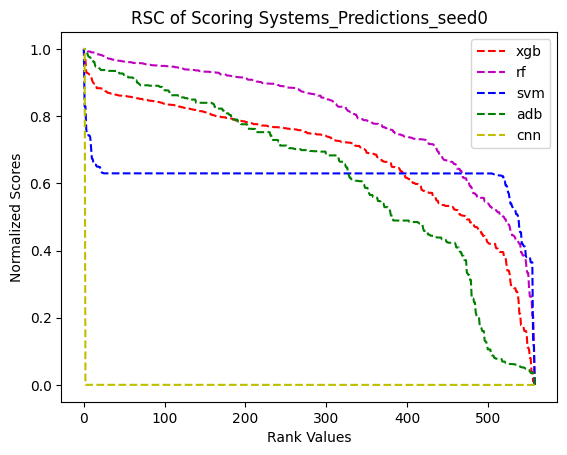

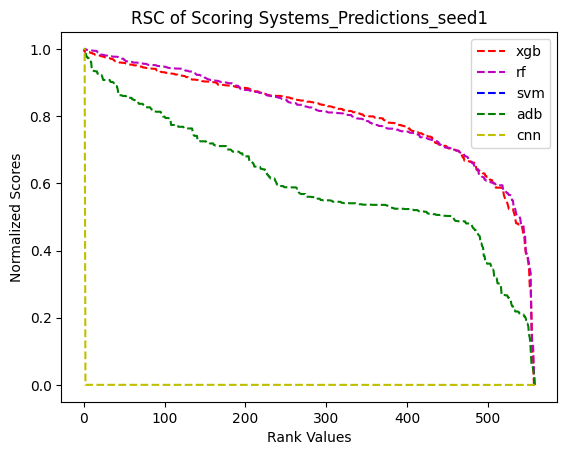

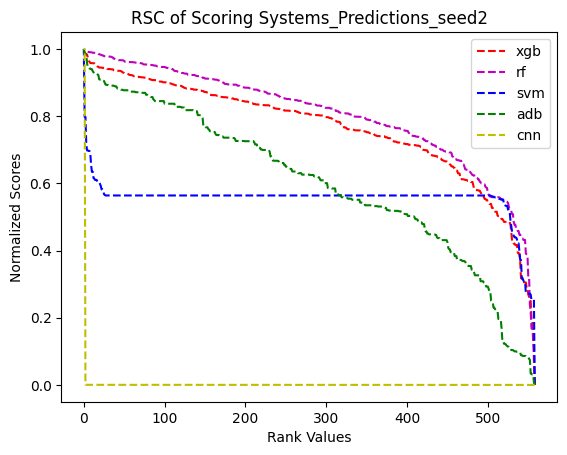

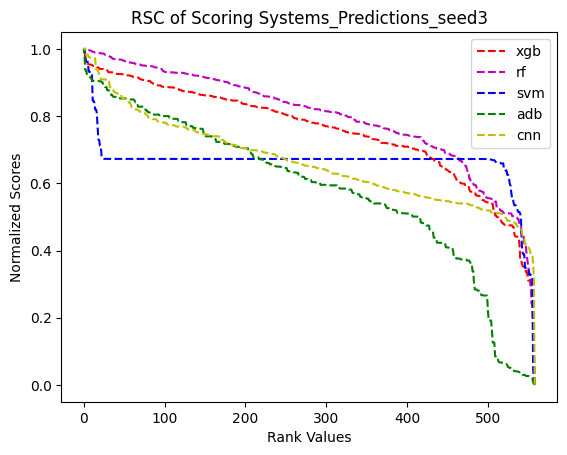

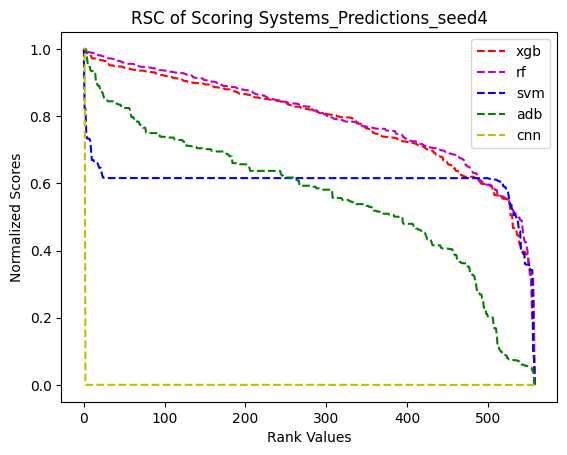

In [45]:
# RSC graphs
colors = ['r--', 'm--', 'b--', 'g--', 'y--']
ranks = np.flip(np.arange(len(predictions_xgb[0])))

for seed in range(len(globals()['predictions_list_%s' % sys])):
  for z in range(len(scoreSys)):
    globals()['line%s' % (z+1)] = plt.plot(ranks, np.sort(normalize(globals()['predictions_%s' % scoreSys[z]][seed])), colors[z], label = scoreSys[z])
    plt.legend(loc = 'upper right')
    plt.title('RSC of Scoring Systems_Predictions_seed%s' % seed)
    plt.xlabel('Rank Values')
    plt.ylabel('Normalized Scores')
  plt.show()


In [46]:
ds_score = [[] for _ in range(5)]

In [47]:
for sys in scoreSys:
  for seed in range(len(ds_score)):
    loc = scoreSys.index(sys)
    scoreSys.remove(sys)
    ds = 0
    for i in range(len(scoreSys)):
      ds += np.sum(np.square(normalize(np.sort(globals()['predictions_%s' % sys][seed]))-normalize(np.sort(globals()['predictions_%s' % scoreSys[i]][seed]))))
    ds = ds/len(scoreSys)
    scoreSys.insert(loc, sys)
    ds_score[seed].append(ds)

In [48]:
ds_score

[[77.6684943585577,
  109.40299523189874,
  73.36214799193385,
  80.36964812335852,
  281.5477631619759],
 [nan, nan, nan, nan, nan],
 [97.62067690302698,
  110.48825160712042,
  68.04542153164516,
  74.85370258450995,
  278.0443348662962],
 [10.29475967071891,
  15.353883300509638,
  15.547856497686023,
  22.582434656207397,
  9.395911417520914],
 [103.28152786979638,
  107.12655933915356,
  70.12531088800523,
  72.02454580783271,
  281.3175267088879]]

In [23]:
ds_rank = np.reciprocal(ds_score)

In [24]:
def mean_absolute_error(y_pred, y_test):
  res = np.mean(np.abs(y_pred - y_test))
  return res

In [25]:
ps_score = [[] for _ in range(5)]

In [26]:
for sys in scoreSys:
  for seed in range(len(ps_score)):
    ps = mean_absolute_error(globals()['predictions_%s' % sys][seed], y_test)
    ps_score[seed].append(ps)

In [27]:
def powerset(s):
    x = len(s)
    ls = []
    for i in range(1 << x):
        ls.append([s[j] for j in range(x) if (i & (1 << j))])
    return ls[1:]

models = powerset(scoreSys)

def myFunc(e):
  return len(e)

models.sort(key=myFunc)

models_list = []
for i in range(len(models)):
  if len(models[i]) == 1:
    models_list.append(models[i][0])
  elif len(models[i]) == 2:
    models_list.append(models[i][0]+'&'+models[i][1])
  elif len(models[i]) == 3:
    models_list.append(models[i][0]+'&'+models[i][1]+'&'+models[i][2])
  elif len(models[i]) == 4:
    models_list.append(models[i][0]+'&'+models[i][1]+'&'+models[i][2]+'&'+models[i][3])
  elif len(models[i]) == 5:
    models_list.append(models[i][0]+'&'+models[i][1]+'&'+models[i][2]+'&'+models[i][3]+'&'+models[i][4])

# Perform average score combinations

In [29]:
avg_score_combine_seed1 = pd.DataFrame({'xgb':predictions_xgb[0], 'rf':predictions_rf[0], 'svm':predictions_svm[0], 'adb':predictions_adb[0], 'cnn':predictions_cnn[0]})
avg_score_combine_seed2 = pd.DataFrame({'xgb':predictions_xgb[1], 'rf':predictions_rf[1], 'svm':predictions_svm[1], 'adb':predictions_adb[1], 'cnn':predictions_cnn[1]})
avg_score_combine_seed3 = pd.DataFrame({'xgb':predictions_xgb[2], 'rf':predictions_rf[2], 'svm':predictions_svm[2], 'adb':predictions_adb[2], 'cnn':predictions_cnn[2]})
avg_score_combine_seed4 = pd.DataFrame({'xgb':predictions_xgb[3], 'rf':predictions_rf[3], 'svm':predictions_svm[3], 'adb':predictions_adb[3], 'cnn':predictions_cnn[3]})
avg_score_combine_seed5 = pd.DataFrame({'xgb':predictions_xgb[4], 'rf':predictions_rf[4], 'svm':predictions_svm[4], 'adb':predictions_adb[4], 'cnn':predictions_cnn[4]})

In [30]:
def avg_score_combine(models_list, single_score):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      single_score[j] = (single_score[j.split('&')[0]]+single_score[j.split('&')[1]]) / 2
    elif len(j.split('&')) == 3:
      single_score[j] = (single_score[j.split('&')[0]]+single_score[j.split('&')[1]]+single_score[j.split('&')[2]]) / 3
    elif len(j.split('&')) == 4:
      single_score[j] = (single_score[j.split('&')[0]]+single_score[j.split('&')[1]]+single_score[j.split('&')[2]]+single_score[j.split('&')[3]]) / 4
    elif len(j.split('&')) == 5:
      single_score[j] = (single_score[j.split('&')[0]]+single_score[j.split('&')[1]]+single_score[j.split('&')[2]]+single_score[j.split('&')[3]]+single_score[j.split('&')[4]]) / 5

In [31]:
avg_score_combine(models_list, avg_score_combine_seed1)
avg_score_combine(models_list, avg_score_combine_seed2)
avg_score_combine(models_list, avg_score_combine_seed3)
avg_score_combine(models_list, avg_score_combine_seed4)
avg_score_combine(models_list, avg_score_combine_seed5)

# Perform average rank combinations

In [32]:
avg_rank_combine_seed1 = pd.DataFrame({'xgb':score_to_rank(predictions_xgb[0]), 'rf':score_to_rank(predictions_rf[0]), 'svm':score_to_rank(predictions_svm[0]), 'adb':score_to_rank(predictions_adb[0]), 'cnn':score_to_rank(predictions_cnn[0])})
avg_rank_combine_seed2 = pd.DataFrame({'xgb':score_to_rank(predictions_xgb[1]), 'rf':score_to_rank(predictions_rf[1]), 'svm':score_to_rank(predictions_svm[1]), 'adb':score_to_rank(predictions_adb[1]), 'cnn':score_to_rank(predictions_cnn[1])})
avg_rank_combine_seed3 = pd.DataFrame({'xgb':score_to_rank(predictions_xgb[2]), 'rf':score_to_rank(predictions_rf[2]), 'svm':score_to_rank(predictions_svm[2]), 'adb':score_to_rank(predictions_adb[2]), 'cnn':score_to_rank(predictions_cnn[2])})
avg_rank_combine_seed4 = pd.DataFrame({'xgb':score_to_rank(predictions_xgb[3]), 'rf':score_to_rank(predictions_rf[3]), 'svm':score_to_rank(predictions_svm[3]), 'adb':score_to_rank(predictions_adb[3]), 'cnn':score_to_rank(predictions_cnn[3])})
avg_rank_combine_seed5 = pd.DataFrame({'xgb':score_to_rank(predictions_xgb[4]), 'rf':score_to_rank(predictions_rf[4]), 'svm':score_to_rank(predictions_svm[4]), 'adb':score_to_rank(predictions_adb[4]), 'cnn':score_to_rank(predictions_cnn[4])})

In [33]:
def avg_rank_combine(models_list, single_rank):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      single_rank[j+'_r'] = (single_rank[j.split('&')[0]]+single_rank[j.split('&')[1]]) / 2
    elif len(j.split('&')) == 3:
      single_rank[j+'_r'] = (single_rank[j.split('&')[0]]+single_rank[j.split('&')[1]]+single_rank[j.split('&')[2]]) / 3
    elif len(j.split('&')) == 4:
      single_rank[j+'_r'] = (single_rank[j.split('&')[0]]+single_rank[j.split('&')[1]]+single_rank[j.split('&')[2]]+single_rank[j.split('&')[3]]) / 4
    elif len(j.split('&')) == 5:
      single_rank[j+'_r'] = (single_rank[j.split('&')[0]]+single_rank[j.split('&')[1]]+single_rank[j.split('&')[2]]+single_rank[j.split('&')[3]]+single_rank[j.split('&')[4]]) / 5

In [34]:
avg_rank_combine(models_list, avg_rank_combine_seed1)
avg_rank_combine(models_list, avg_rank_combine_seed2)
avg_rank_combine(models_list, avg_rank_combine_seed3)
avg_rank_combine(models_list, avg_rank_combine_seed4)
avg_rank_combine(models_list, avg_rank_combine_seed5)

# Perform weighted score combination by diversity strength

In [35]:
ds_score_combine_seed1 = pd.DataFrame()
ds_score_combine_seed2 = pd.DataFrame()
ds_score_combine_seed3 = pd.DataFrame()
ds_score_combine_seed4 = pd.DataFrame()
ds_score_combine_seed5 = pd.DataFrame()

In [36]:
def ds_score_combine(models_list, single_score, ds_score_combine, ds_score):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      ds_score_combine[j+'_ds'] = (single_score[j.split('&')[0]]*ds_score[scoreSys.index(j.split('&')[0])]+single_score[j.split('&')[1]]*ds_score[scoreSys.index(j.split('&')[1])])/(ds_score[scoreSys.index(j.split('&')[0])] + ds_score[scoreSys.index(j.split('&')[1])])
    elif len(j.split('&')) == 3:
      ds_score_combine[j+'_ds'] = (single_score[j.split('&')[0]]*ds_score[scoreSys.index(j.split('&')[0])]+single_score[j.split('&')[1]]*ds_score[scoreSys.index(j.split('&')[1])]+single_score[j.split('&')[2]]*ds_score[scoreSys.index(j.split('&')[2])])/(ds_score[scoreSys.index(j.split('&')[0])] + ds_score[scoreSys.index(j.split('&')[1])] + ds_score[scoreSys.index(j.split('&')[2])])
    elif len(j.split('&')) == 4:
      ds_score_combine[j+'_ds'] = (single_score[j.split('&')[0]]*ds_score[scoreSys.index(j.split('&')[0])]+single_score[j.split('&')[1]]*ds_score[scoreSys.index(j.split('&')[1])]+single_score[j.split('&')[2]]*ds_score[scoreSys.index(j.split('&')[2])]+single_score[j.split('&')[3]]*ds_score[scoreSys.index(j.split('&')[3])])/(ds_score[scoreSys.index(j.split('&')[0])] + ds_score[scoreSys.index(j.split('&')[1])] + ds_score[scoreSys.index(j.split('&')[2])] + ds_score[scoreSys.index(j.split('&')[3])])
    elif len(j.split('&')) == 5:
      ds_score_combine[j+'_ds'] = (single_score[j.split('&')[0]]*ds_score[scoreSys.index(j.split('&')[0])]+single_score[j.split('&')[1]]*ds_score[scoreSys.index(j.split('&')[1])]+single_score[j.split('&')[2]]*ds_score[scoreSys.index(j.split('&')[2])]+single_score[j.split('&')[3]]*ds_score[scoreSys.index(j.split('&')[3])]+single_score[j.split('&')[4]]*ds_score[scoreSys.index(j.split('&')[4])])/(ds_score[scoreSys.index(j.split('&')[0])] + ds_score[scoreSys.index(j.split('&')[1])] + ds_score[scoreSys.index(j.split('&')[2])] + ds_score[scoreSys.index(j.split('&')[3])] + ds_score[scoreSys.index(j.split('&')[4])])

In [37]:
ds_score_combine(models_list, avg_score_combine_seed1, ds_score_combine_seed1, ds_score[0])
ds_score_combine(models_list, avg_score_combine_seed2, ds_score_combine_seed2, ds_score[1])
ds_score_combine(models_list, avg_score_combine_seed3, ds_score_combine_seed3, ds_score[2])
ds_score_combine(models_list, avg_score_combine_seed4, ds_score_combine_seed4, ds_score[3])
ds_score_combine(models_list, avg_score_combine_seed5, ds_score_combine_seed5, ds_score[4])

# Perform weighted rank combination by diversity strength

In [38]:
ds_rank_combine_seed1 = pd.DataFrame()
ds_rank_combine_seed2 = pd.DataFrame()
ds_rank_combine_seed3 = pd.DataFrame()
ds_rank_combine_seed4 = pd.DataFrame()
ds_rank_combine_seed5 = pd.DataFrame()

In [39]:
def ds_rank_combine(models_list, single_rank, ds_rank_combine, ds_rank):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      ds_rank_combine[j+'_ds_r'] = (single_rank[j.split('&')[0]]*ds_rank[scoreSys.index(j.split('&')[0])]+single_rank[j.split('&')[1]]*ds_rank[scoreSys.index(j.split('&')[1])])/(ds_rank[scoreSys.index(j.split('&')[0])] + ds_rank[scoreSys.index(j.split('&')[1])])
    elif len(j.split('&')) == 3:
      ds_rank_combine[j+'_ds_r'] = (single_rank[j.split('&')[0]]*ds_rank[scoreSys.index(j.split('&')[0])]+single_rank[j.split('&')[1]]*ds_rank[scoreSys.index(j.split('&')[1])]+single_rank[j.split('&')[2]]*ds_rank[scoreSys.index(j.split('&')[2])])/(ds_rank[scoreSys.index(j.split('&')[0])] + ds_rank[scoreSys.index(j.split('&')[1])] + ds_rank[scoreSys.index(j.split('&')[2])])
    elif len(j.split('&')) == 4:
      ds_rank_combine[j+'_ds_r'] = (single_rank[j.split('&')[0]]*ds_rank[scoreSys.index(j.split('&')[0])]+single_rank[j.split('&')[1]]*ds_rank[scoreSys.index(j.split('&')[1])]+single_rank[j.split('&')[2]]*ds_rank[scoreSys.index(j.split('&')[2])]+single_rank[j.split('&')[3]]*ds_rank[scoreSys.index(j.split('&')[3])])/(ds_rank[scoreSys.index(j.split('&')[0])] + ds_rank[scoreSys.index(j.split('&')[1])] + ds_rank[scoreSys.index(j.split('&')[2])] + ds_rank[scoreSys.index(j.split('&')[3])])
    elif len(j.split('&')) == 5:
      ds_rank_combine[j+'_ds_r'] = (single_rank[j.split('&')[0]]*ds_rank[scoreSys.index(j.split('&')[0])]+single_rank[j.split('&')[1]]*ds_rank[scoreSys.index(j.split('&')[1])]+single_rank[j.split('&')[2]]*ds_rank[scoreSys.index(j.split('&')[2])]+single_rank[j.split('&')[3]]*ds_rank[scoreSys.index(j.split('&')[3])]+single_rank[j.split('&')[4]]*ds_rank[scoreSys.index(j.split('&')[4])])/(ds_rank[scoreSys.index(j.split('&')[0])] + ds_rank[scoreSys.index(j.split('&')[1])] + ds_rank[scoreSys.index(j.split('&')[2])] + ds_rank[scoreSys.index(j.split('&')[3])] + ds_rank[scoreSys.index(j.split('&')[4])])

In [40]:
ds_rank_combine(models_list, avg_rank_combine_seed1, ds_rank_combine_seed1, ds_rank[0])
ds_rank_combine(models_list, avg_rank_combine_seed2, ds_rank_combine_seed2, ds_rank[1])
ds_rank_combine(models_list, avg_rank_combine_seed3, ds_rank_combine_seed3, ds_rank[2])
ds_rank_combine(models_list, avg_rank_combine_seed4, ds_rank_combine_seed4, ds_rank[3])
ds_rank_combine(models_list, avg_rank_combine_seed5, ds_rank_combine_seed5, ds_rank[4])

# Perform weighted score combination by performance strength (MAE)

In [41]:
ps_score_combine_seed1 = pd.DataFrame()
ps_score_combine_seed2 = pd.DataFrame()
ps_score_combine_seed3 = pd.DataFrame()
ps_score_combine_seed4 = pd.DataFrame()
ps_score_combine_seed5 = pd.DataFrame()

In [42]:
def ps_score_combine(models_list, single_score, ps_score_combine, ps_score):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      ps_score_combine[j+'_ps'] = (single_score[j.split('&')[0]]*(1 / ps_score[scoreSys.index(j.split('&')[0])])+single_score[j.split('&')[1]]*(1 / ps_score[scoreSys.index(j.split('&')[1])]))/(1 / ps_score[scoreSys.index(j.split('&')[0])] + 1 / ps_score[scoreSys.index(j.split('&')[1])])
    elif len(j.split('&')) == 3:
      ps_score_combine[j+'_ps'] = (single_score[j.split('&')[0]]*(1 / ps_score[scoreSys.index(j.split('&')[0])])+single_score[j.split('&')[1]]*(1 / ps_score[scoreSys.index(j.split('&')[1])])+single_score[j.split('&')[2]]*(1 / ps_score[scoreSys.index(j.split('&')[2])]))/(1 / ps_score[scoreSys.index(j.split('&')[0])] + 1 / ps_score[scoreSys.index(j.split('&')[1])] + 1 / ps_score[scoreSys.index(j.split('&')[2])])
    elif len(j.split('&')) == 4:
      ps_score_combine[j+'_ps'] = (single_score[j.split('&')[0]]*(1 / ps_score[scoreSys.index(j.split('&')[0])])+single_score[j.split('&')[1]]*(1 / ps_score[scoreSys.index(j.split('&')[1])])+single_score[j.split('&')[2]]*(1 / ps_score[scoreSys.index(j.split('&')[2])])+single_score[j.split('&')[3]]*(1 / ps_score[scoreSys.index(j.split('&')[3])]))/(1 / ps_score[scoreSys.index(j.split('&')[0])] + 1 / ps_score[scoreSys.index(j.split('&')[1])] + 1 / ps_score[scoreSys.index(j.split('&')[2])] + ps_score[scoreSys.index(j.split('&')[3])])
    elif len(j.split('&')) == 5:
      ps_score_combine[j+'_ps'] = (single_score[j.split('&')[0]]*(1 / ps_score[scoreSys.index(j.split('&')[0])])+single_score[j.split('&')[1]]*(1 / ps_score[scoreSys.index(j.split('&')[1])])+single_score[j.split('&')[2]]*(1 / ps_score[scoreSys.index(j.split('&')[2])])+single_score[j.split('&')[3]]*(1 / ps_score[scoreSys.index(j.split('&')[3])])+single_score[j.split('&')[4]]*(1 / ps_score[scoreSys.index(j.split('&')[4])]))/(1 / ps_score[scoreSys.index(j.split('&')[0])] + 1 / ps_score[scoreSys.index(j.split('&')[1])] + 1 / ps_score[scoreSys.index(j.split('&')[2])] + 1 / ps_score[scoreSys.index(j.split('&')[3])] + 1 / ps_score[scoreSys.index(j.split('&')[4])])

In [43]:
ps_score_combine(models_list, avg_score_combine_seed1, ps_score_combine_seed1, ps_score[0])
ps_score_combine(models_list, avg_score_combine_seed2, ps_score_combine_seed2, ps_score[1])
ps_score_combine(models_list, avg_score_combine_seed3, ps_score_combine_seed3, ps_score[2])
ps_score_combine(models_list, avg_score_combine_seed4, ps_score_combine_seed4, ps_score[3])
ps_score_combine(models_list, avg_score_combine_seed5, ps_score_combine_seed5, ps_score[4])

# Perform weighted rank combination by performance strength

In [44]:
ps_rank_combine_seed1 = pd.DataFrame()
ps_rank_combine_seed2 = pd.DataFrame()
ps_rank_combine_seed3 = pd.DataFrame()
ps_rank_combine_seed4 = pd.DataFrame()
ps_rank_combine_seed5 = pd.DataFrame()

In [45]:
def ps_rank_combine(models_list, single_rank, ps_rank_combine, ps_score):
  for j in models_list[len(scoreSys):]:
    if len(j.split('&')) == 2:
      ps_rank_combine[j+'_ps_r'] = (single_rank[j.split('&')[0]]*(ps_score[scoreSys.index(j.split('&')[0])])+single_rank[j.split('&')[1]]*(ps_score[scoreSys.index(j.split('&')[1])]))/(ps_score[scoreSys.index(j.split('&')[0])] + ps_score[scoreSys.index(j.split('&')[1])])
    elif len(j.split('&')) == 3:
      ps_rank_combine[j+'_ps_r'] = (single_rank[j.split('&')[0]]*(ps_score[scoreSys.index(j.split('&')[0])])+single_rank[j.split('&')[1]]*(ps_score[scoreSys.index(j.split('&')[1])])+single_rank[j.split('&')[2]]*(ps_score[scoreSys.index(j.split('&')[2])]))/(ps_score[scoreSys.index(j.split('&')[0])] + ps_score[scoreSys.index(j.split('&')[1])] + ps_score[scoreSys.index(j.split('&')[2])])
    elif len(j.split('&')) == 4:
      ps_rank_combine[j+'_ps_r'] = (single_rank[j.split('&')[0]]*(ps_score[scoreSys.index(j.split('&')[0])])+single_rank[j.split('&')[1]]*(ps_score[scoreSys.index(j.split('&')[1])])+single_rank[j.split('&')[2]]*(ps_score[scoreSys.index(j.split('&')[2])])+single_rank[j.split('&')[3]]*(ps_score[scoreSys.index(j.split('&')[3])]))/(ps_score[scoreSys.index(j.split('&')[0])] + ps_score[scoreSys.index(j.split('&')[1])] + ps_score[scoreSys.index(j.split('&')[2])] + ps_score[scoreSys.index(j.split('&')[3])])
    elif len(j.split('&')) == 5:
      ps_rank_combine[j+'_ps_r'] = (single_rank[j.split('&')[0]]*(ps_score[scoreSys.index(j.split('&')[0])])+single_rank[j.split('&')[1]]*(ps_score[scoreSys.index(j.split('&')[1])])+single_rank[j.split('&')[2]]*(ps_score[scoreSys.index(j.split('&')[2])])+single_rank[j.split('&')[3]]*(ps_score[scoreSys.index(j.split('&')[3])])+single_rank[j.split('&')[4]]*(ps_score[scoreSys.index(j.split('&')[4])]))/(ps_score[scoreSys.index(j.split('&')[0])] + ps_score[scoreSys.index(j.split('&')[1])] + ps_score[scoreSys.index(j.split('&')[2])] + ps_score[scoreSys.index(j.split('&')[3])] + ps_score[scoreSys.index(j.split('&')[4])])

In [46]:
ps_rank_combine(models_list, avg_rank_combine_seed1, ps_rank_combine_seed1, ps_score[0])
ps_rank_combine(models_list, avg_rank_combine_seed2, ps_rank_combine_seed2, ps_score[1])
ps_rank_combine(models_list, avg_rank_combine_seed3, ps_rank_combine_seed3, ps_score[2])
ps_rank_combine(models_list, avg_rank_combine_seed4, ps_rank_combine_seed4, ps_score[3])
ps_rank_combine(models_list, avg_rank_combine_seed5, ps_rank_combine_seed5, ps_score[4])

In [47]:
avg_rank_combine_seed1.rename(columns={'xgb': 'xgb_r', 'rf': 'rf_r', 'svm': 'svm_r', 'adb': 'adb_r', 'cnn': 'cnn_r'}, inplace=True)
avg_rank_combine_seed2.rename(columns={'xgb': 'xgb_r', 'rf': 'rf_r', 'svm': 'svm_r', 'adb': 'adb_r', 'cnn': 'cnn_r'}, inplace=True)
avg_rank_combine_seed3.rename(columns={'xgb': 'xgb_r', 'rf': 'rf_r', 'svm': 'svm_r', 'adb': 'adb_r', 'cnn': 'cnn_r'}, inplace=True)
avg_rank_combine_seed4.rename(columns={'xgb': 'xgb_r', 'rf': 'rf_r', 'svm': 'svm_r', 'adb': 'adb_r', 'cnn': 'cnn_r'}, inplace=True)
avg_rank_combine_seed5.rename(columns={'xgb': 'xgb_r', 'rf': 'rf_r', 'svm': 'svm_r', 'adb': 'adb_r', 'cnn': 'cnn_r'}, inplace=True)

# Calculate MAE

In [48]:
score_combine_list = np.hstack((np.array(avg_score_combine_seed1.columns), np.array(ds_score_combine_seed1.columns), np.array(ps_score_combine_seed1.columns)))
MAE = pd.DataFrame(index = score_combine_list)
for i in range(1, 6):
  mae_avg, mae_ds, mae_ps = [], [], []
  for col in globals()['avg_score_combine_seed%s' %i].columns:
    mae = mean_absolute_error(np.array(globals()['avg_score_combine_seed%s' %i][col]), y_test)
    mae_avg.append(mae)
  for col in globals()['ds_score_combine_seed%s' %i].columns:
    mae = mean_absolute_error(np.array(globals()['ds_score_combine_seed%s' %i][col]), y_test)
    mae_ds.append(mae)
  for col in globals()['ps_score_combine_seed%s' %i].columns:
    mae = mean_absolute_error(np.array(globals()['ps_score_combine_seed%s' %i][col]), y_test)
    mae_ps.append(mae)
  MAE['seed'+str(i)] = np.hstack((mae_avg, mae_ds, mae_ps))

In [49]:
pd.set_option('display.max_rows', None)

In [50]:
MAE['avg_MAE'] = MAE.mean(axis=1)

In [51]:
MAE.sort_values(by='avg_MAE')

,seed1,seed2,seed3,seed4,seed5,avg_MAE
xgb&svm&cnn_ps,1.175254,1.189296,1.166353,1.176622,1.150529,1.171611
xgb&svm&cnn,1.175533,1.189670,1.166559,1.176832,1.151802,1.172079
xgb&svm&cnn_ds,1.177045,1.214819,1.169389,1.176325,1.147247,1.176965
xgb&rf&svm&cnn_ds,1.211622,1.204063,1.173290,1.190994,1.162743,1.188543
xgb&cnn_ps,1.192356,1.204854,1.180990,1.194896,1.172241,1.189067
xgb&cnn,1.192464,1.206193,1.181241,1.194976,1.174195,1.189814
xgb&svm_ps,1.207417,1.217391,1.185758,1.196590,1.145419,1.190515
xgb&svm,1.208351,1.217400,1.185786,1.196892,1.145417,1.190769
xgb&svm_ds,1.214343,1.218833,1.188664,1.194747,1.146109,1.192539
xgb&rf&svm&cnn,1.211426,1.206081,1.186616,1.199295,1.171060,1.194896
